# Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataframe
df = pd.read_csv("/content/drive/MyDrive/masters_ppg/final_df_2_stages_stand.csv")


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

features = df.drop(columns=['2_stages'])  # Extract features excluding the label column

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)
features_imputed = pd.DataFrame(features_imputed, columns=features.columns)

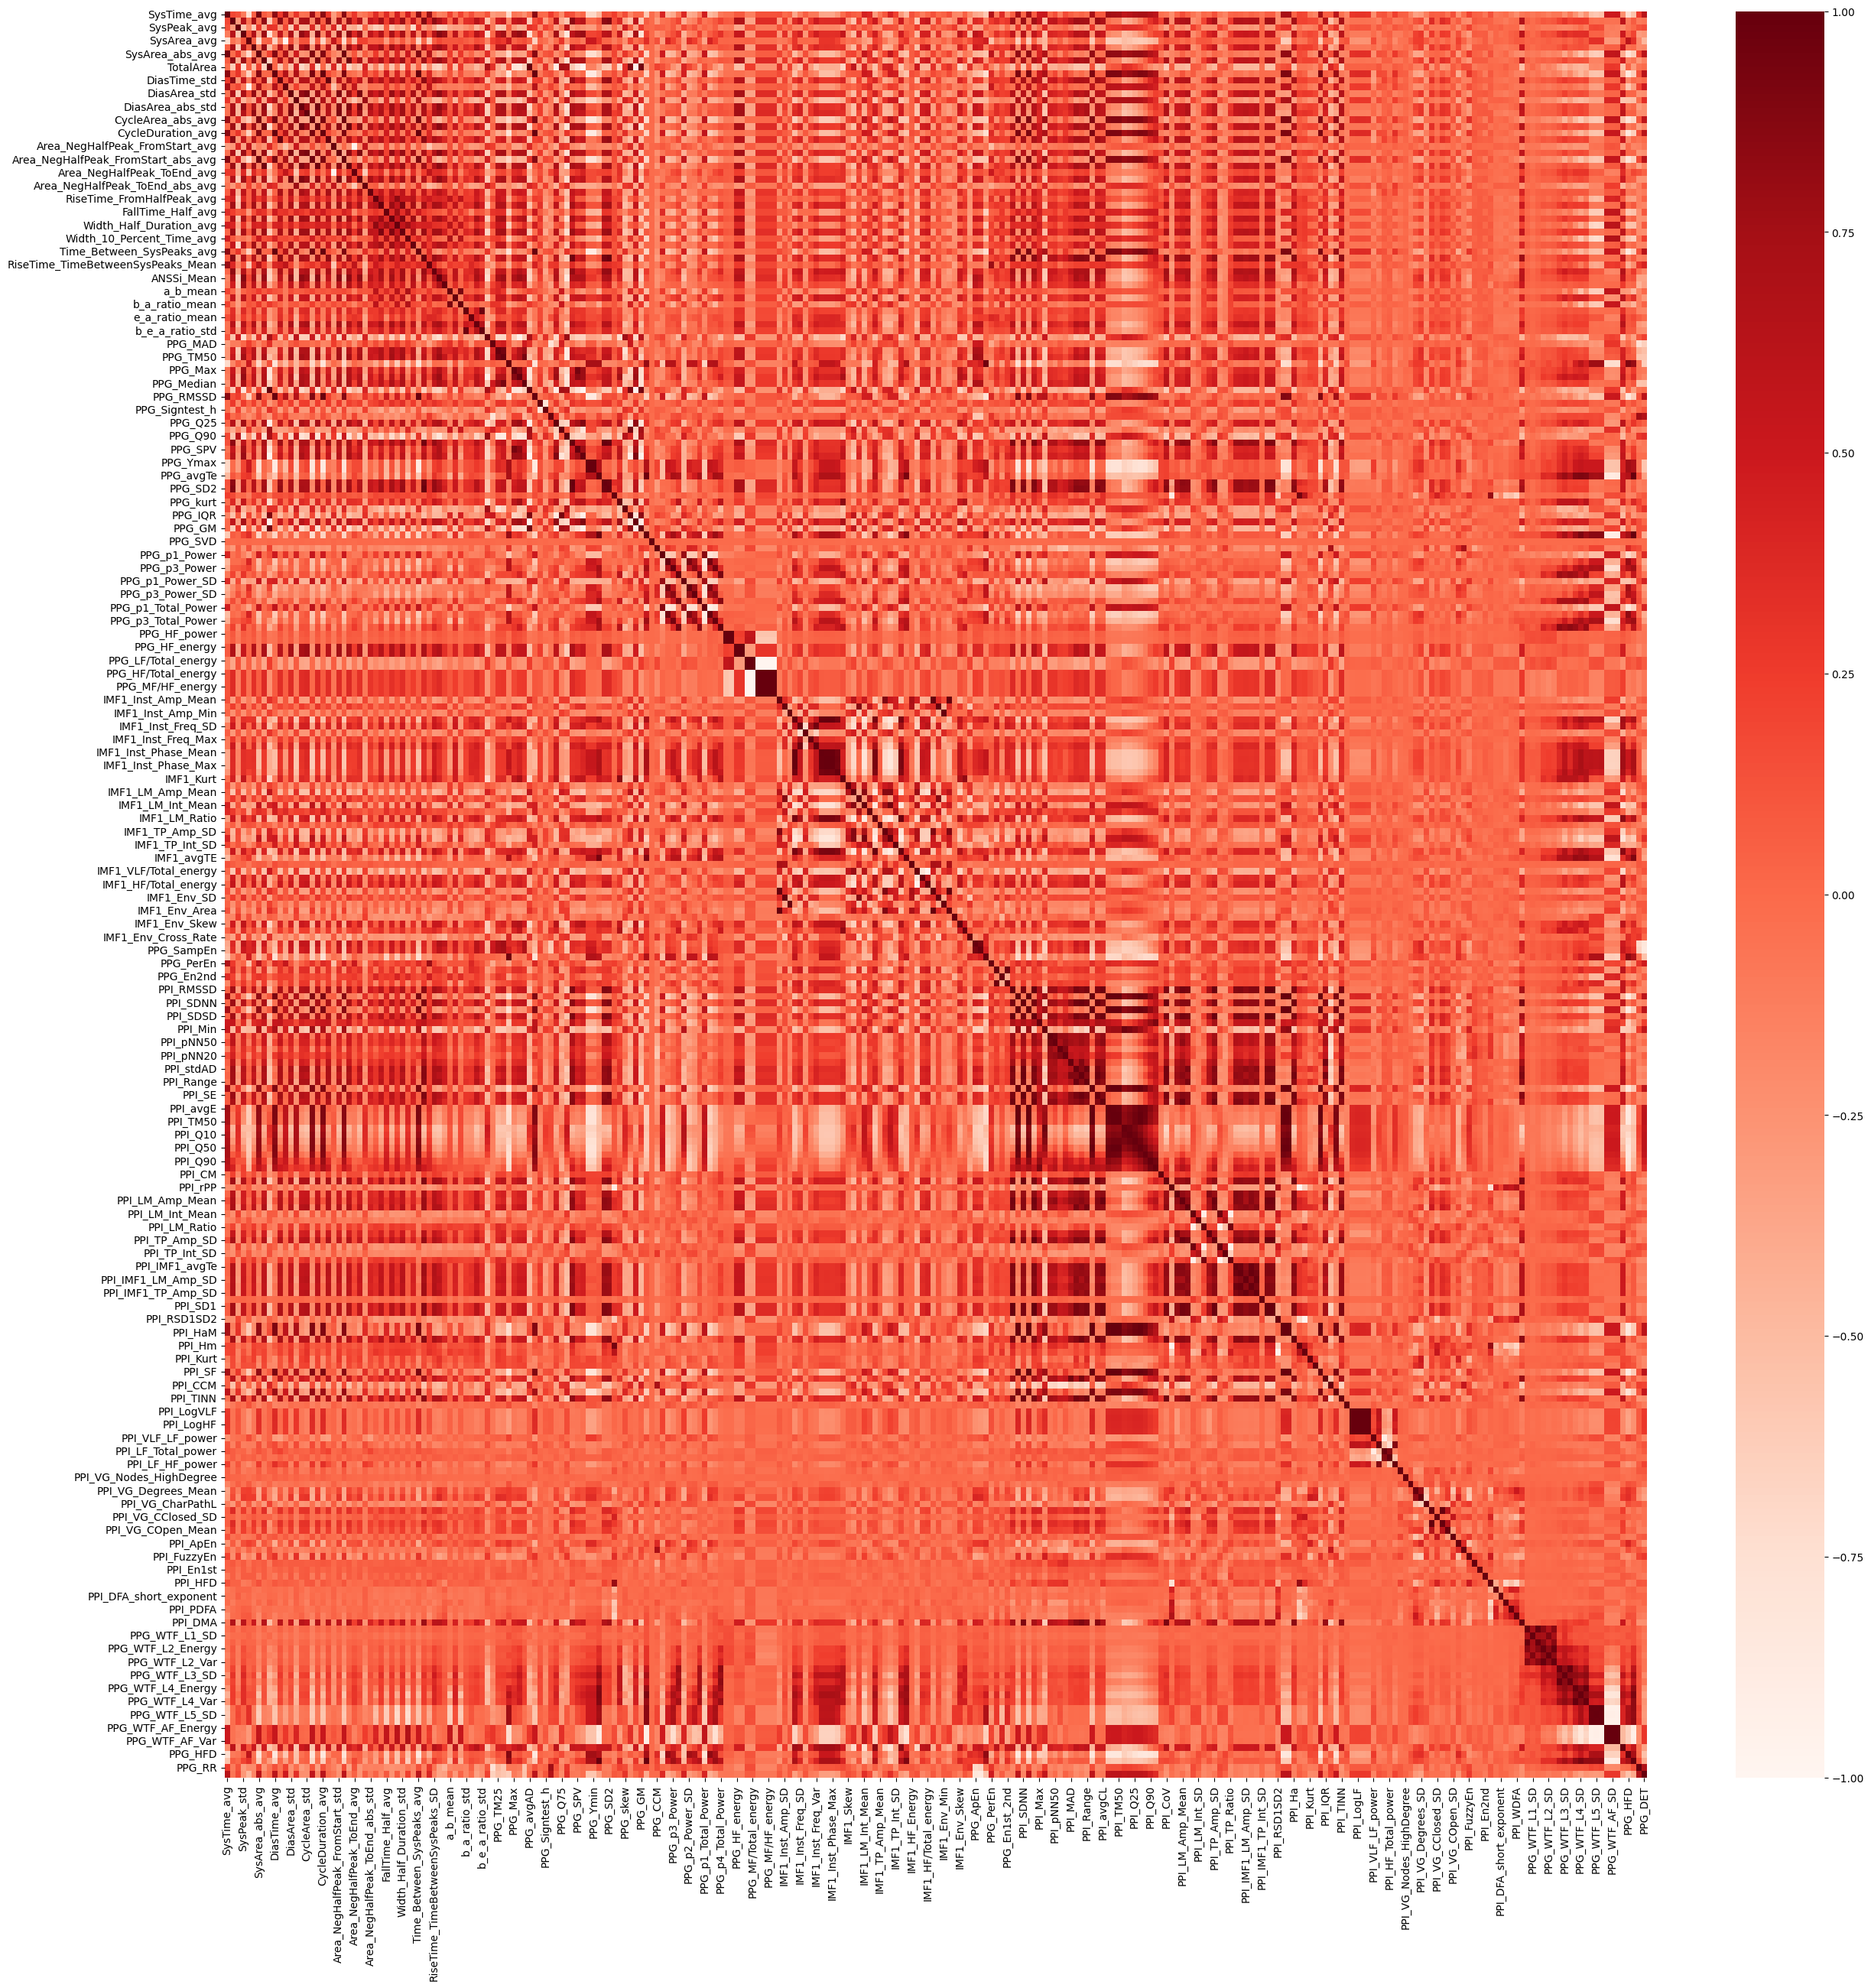

In [4]:
cor = features_imputed.corr()
plt.figure(figsize=(30,30))
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()


In [5]:
# Select upper triangle of correlation matrix
upper_tri = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

print("Columns to drop due to high correlation:", to_drop)


Columns to drop due to high correlation: ['CycleArea_abs_std', 'CycleDuration_avg', 'CycleDuration_std', 'Area_NegHalfPeak_FromStart_abs_avg', 'Area_NegHalfPeak_FromStart_abs_std', 'Time_Between_SysPeaks_avg', 'b_e_a_ratio_std', 'PPG_avgAD', 'PPG_RMSSD', 'PPG_Ymin', 'PPG_SD1', 'PPG_SD2', 'PPG_Hm', 'PPG_Total_power2', 'PPG_Total_energy', 'PPG_MF/Total_energy', 'PPG_LF/HF_energy', 'PPG_MF/HF_energy', 'PPG_LF/MF_energy', 'IMF1_Inst_Freq_Var', 'IMF1_Inst_Phase_Mean', 'IMF1_Inst_Phase_SD', 'IMF1_Inst_Phase_Max', 'IMF1_Inst_Phase_Var', 'IMF1_TP_Ratio', 'IMF1_Env_Mean', 'IMF1_Env_SD', 'IMF1_Env_Min', 'IMF1_Env_Area', 'PPG_FuzzyEn', 'PPG_En1st_2nd', 'PPI_Mean', 'PPI_SDSD', 'PPI_pNN50', 'PPI_stdAD', 'PPI_avgAD', 'PPI_Range', 'PPI_Median', 'PPI_SE', 'PPI_avgCL', 'PPI_avgE', 'PPI_TM25', 'PPI_TM50', 'PPI_Q5', 'PPI_Q10', 'PPI_Q25', 'PPI_Q50', 'PPI_Q75', 'PPI_CoV', 'PPI_LM_Amp_Mean', 'PPI_TP_Amp_SD', 'PPI_TP_Int_Mean', 'PPI_IMF1_LM_Amp_Mean', 'PPI_IMF1_TP_Amp_Mean', 'PPI_IMF1_TP_Amp_SD', 'PPI_SD1', 

In [6]:
# Drop these columns from the DataFrame
df_revised = df.drop(columns=to_drop)

In [7]:
# Check NaNs

nan_columns = df_revised.columns[df_revised.isna().any()].tolist()

print("Columns with NaN values:")
print(nan_columns)

nan_counts = df_revised.isna().sum()
print("Number of NaN values in each column:")
print(nan_counts[nan_counts > 0])

# Calculate the threshold for 10% of the total number of rows
threshold = 0.02 * len(df_revised)

# Filter columns where the number of NaN values exceeds the threshold
nan_columns_2percent = nan_counts[nan_counts >= threshold]

# Print the columns with NaN values exceeding the threshold
print("Columns with NaN values exceeding 2% of the total data:")
print(nan_columns_2percent)


Columns with NaN values:
['a_b_mean', 'a_b_std', 'b_a_ratio_mean', 'b_a_ratio_std', 'e_a_ratio_mean', 'e_a_ratio_std', 'PPI_RMSSD', 'PPI_RMS', 'PPI_SDNN', 'PPI_Max', 'PPI_Min', 'PPI_NN50', 'PPI_NN20', 'PPI_pNN20', 'PPI_MAD', 'PPI_Q90', 'PPI_Q95', 'PPI_CM', 'PPI_rPP', 'PPI_avgTe', 'PPI_LM_Amp_SD', 'PPI_LM_Int_Mean', 'PPI_LM_Int_SD', 'PPI_LM_Ratio', 'PPI_TP_Amp_Mean', 'PPI_TP_Int_SD', 'PPI_TP_Ratio', 'PPI_IMF1_avgTe', 'PPI_IMF1_LM_Amp_SD', 'PPI_IMF1_TP_Int_SD', 'PPI_RSD1SD2', 'PPI_Ha', 'PPI_Hm', 'PPI_Hc', 'PPI_Kurt', 'PPI_Skew', 'PPI_IQR', 'PPI_CCM', 'PPI_SVD', 'PPI_Triangular_Index', 'PPI_LogVLF', 'PPI_VLF_LF_power', 'PPI_VLF_HF_power', 'PPI_LF_Total_power', 'PPI_HF_Total_power', 'PPI_LF_HF_power', 'PPI_VG_Nodes_SmallDegree', 'PPI_VG_Nodes_HighDegree', 'PPI_VG_Slope_PowerLawFit', 'PPI_VG_Degrees_Mean', 'PPI_VG_Degrees_SD', 'PPI_VG_CharPathL', 'PPI_VG_CClosed_Mean', 'PPI_VG_CClosed_SD', 'PPI_VG_COpen_Mean', 'PPI_VG_COpen_SD', 'PPI_ApEn', 'PPI_SampEn', 'PPI_FuzzyEn', 'PPI_PerEn', 'PPI_En1

In [8]:
# Drop columns where more than 2% of data is NaNs
columns_to_drop = ['PPI_VG_Slope_PowerLawFit', 'PPI_VG_COpen_Mean', 'PPI_VG_COpen_SD']

# Drop the specified columns from the DataFrame
df_revised = df_revised.drop(columns=columns_to_drop)


In [9]:
df_revised

,2_stages,SysTime_avg,SysTime_std,SysPeak_avg,SysPeak_std,SysArea_avg,SysArea_std,SysArea_abs_avg,SysArea_abs_std,TotalArea,...,PPG_WTF_L3_Energy,PPG_WTF_L3_SD,PPG_WTF_L4_Energy,PPG_WTF_L4_SD,PPG_WTF_L5_Energy,PPG_WTF_AF_Energy,PPG_LC,PPG_HFD,PPG_RR,PPG_DET
0,0,0.243075,0.106977,2.051287,1.271953,-1.285312,14.791261,0.190149,0.285010,20.185956,...,2.630119,0.073414,73.786172,0.544357,469.265490,3326.216471,56.679685,1.596500,0.103262,0.916861
1,0,0.343277,0.225440,1.927268,1.754324,2.661957,17.248446,0.190526,0.227912,18.963432,...,14.351267,0.171489,124.451367,0.706797,986.855721,2731.753050,59.669821,1.481480,0.100278,0.961463
2,0,0.274200,0.101530,2.242864,1.318513,0.956881,15.603188,0.206661,0.128348,22.063562,...,2.109012,0.065740,47.301892,0.435842,452.286898,3424.140494,61.623213,1.512300,0.070013,0.889709
3,0,0.437240,0.398992,2.824896,1.867212,-1.905432,15.568619,0.304404,0.272068,21.087311,...,18.348238,0.193904,357.419869,1.197743,748.970794,2720.494751,62.408353,1.531390,0.075477,0.864056
4,0,0.274282,0.135000,2.913433,0.555042,1.484555,19.700900,0.274228,0.189381,25.268359,...,1.450890,0.054526,51.561563,0.455048,495.221854,3298.400148,56.876811,1.638568,0.066558,0.853705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85537,0,0.457332,0.147955,2.894850,0.439800,0.939364,7.744200,0.444941,0.150386,25.575405,...,0.705908,0.038033,12.749257,0.226207,291.749987,3568.318762,50.156012,1.312859,0.086904,0.944182
85538,0,0.418870,0.159254,2.790856,0.775927,3.364588,9.194997,0.412621,0.191717,25.140178,...,0.549422,0.033554,14.531636,0.241577,238.542476,3596.889402,51.241862,1.329070,0.086235,0.943974
85539,0,0.418692,0.121094,2.838916,0.431103,3.748585,6.014400,0.411671,0.143435,25.719602,...,0.758148,0.039415,13.286614,0.230992,255.100137,3622.677753,49.838657,1.319159,0.101377,0.951243
85540,0,0.412946,0.169847,2.848124,0.521313,2.600567,7.562719,0.405593,0.191824,25.362439,...,0.974665,0.044691,13.945365,0.236626,336.559393,3546.296684,50.857749,1.367742,0.084736,0.934705


# Prepare X and y

In [ ]:
# Load subjects
df_subjects = pd.read_csv("/content/drive/MyDrive/masters_ppg/subjects.csv")

# Merge
df_revised = df_revised.copy()
df_revised['SubjectID'] = df_subjects['SubjectID']

# Assuming you've already done data preparation up to scaling
# Drop the '2_stages' and 'Subject' columns to get the features
X = df_revised.drop(['2_stages', 'SubjectID'], axis=1) #'PPI_GM', 'PPG_Hc', 'PPI_Signtest_h', 'PPI_Normalitytest_p', 'PPI_peakVLF'

# Convert labels and subjects for later use
y = df_revised['2_stages']
groups = df_revised['SubjectID']


# RUS

## Balance the dataset

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler

def resample_within_groups(X, y, groups):
    unique_groups = np.unique(groups)
    resampled_X, resampled_y, resampled_groups = [], [], []
    imputer = SimpleImputer(strategy='mean')  # Define the imputer

    for group in unique_groups:
        mask = groups == group
        X_g, y_g = X[mask], y[mask]

        # Impute missing values
        X_g = imputer.fit_transform(X_g)

        try:
            rus = RandomUnderSampler(random_state=42)
            X_resampled_g, y_resampled_g = rus.fit_resample(X_g, y_g)
        except ValueError:
            print(f"RUS failed for group {group}, using original samples.")
            X_resampled_g, y_resampled_g = X_g, y_g  # Fallback to original data

        resampled_X.append(pd.DataFrame(X_resampled_g, columns=X.columns))
        resampled_y.append(pd.Series(y_resampled_g))
        resampled_groups.extend([group] * len(y_resampled_g))

    return pd.concat(resampled_X, ignore_index=True), pd.concat(resampled_y, ignore_index=True), np.array(resampled_groups)

# Then you can call this function as before:
X_resampled, y_resampled, groups_resampled = resample_within_groups(X, y, groups)


In [ ]:
# Get classes in X_train
label_counts = y_resampled.value_counts()
print(label_counts)

2_stages
0    15756
1    15756
Name: count, dtype: int64


# Feature Selection

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GroupKFold
from imblearn.pipeline import Pipeline as ImblearnPipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, matthews_corrcoef


# Create the full pipeline including the preprocessing and the classifier
pipeline = ImblearnPipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier(random_state=42))
])

# This function will be used by RFECV to determine feature importances
def get_feature_importances(estimator):
    # Assuming that 'classifier' is the name given to the RandomForestClassifier step within your pipeline
    if hasattr(estimator.named_steps['classifier'], 'feature_importances_'):
        return estimator.named_steps['classifier'].feature_importances_
    else:
        raise ValueError('The classifier does not have an attribute feature_importances_')

# Define MCC as the scoring metric using make_scorer
mcc_scorer = make_scorer(matthews_corrcoef)

# Initialize RFECV with GroupKFold to respect group boundaries in the feature selection process
group_kfold = GroupKFold(n_splits=5)
rfecv = RFECV(
    estimator=pipeline,
    step=1,
    cv=group_kfold.split(X_resampled, y_resampled, groups_resampled),
    scoring=mcc_scorer,
    min_features_to_select=10,
    importance_getter=get_feature_importances,
    n_jobs=-1 # Use the custom function for feature importances
)


# Fit RFECV
# Note: We fit directly on the non-preprocessed data since the pipeline takes care of preprocessing
rfecv.fit(X_resampled, y_resampled)  # Ensure groups are passed correctly for GroupKFold

# Output the number of selected features
print(f"Number of selected features: {sum(rfecv.support_)}")
print(f"Best features: {X_resampled.columns[rfecv.support_]}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


sfm = SelectFromModel(estimator=RandomForestClassifier(n_estimators=100, random_state=42))
sfm.fit(X_resampled, y_resampled)

# Get the boolean mask indicating which features are selected
selected_features_mask = sfm.get_support()

# Get the names of the selected features from the original DataFrame
selected_features = X_resampled.columns[selected_features_mask]

print("Selected features:", selected_features)


Selected features: Index(['SysPeak_avg', 'SysPeak_std', 'SysArea_avg', 'SysArea_std',
       'SysArea_abs_avg', 'TotalArea', 'DiasTime_avg', 'DiasArea_avg',
       'DiasArea_std', 'DiasArea_abs_avg', 'DiasArea_abs_std', 'CycleArea_std',
       'CycleArea_abs_avg', 'Area_NegHalfPeak_FromStart_avg',
       'Area_NegHalfPeak_FromStart_std', 'Area_NegHalfPeak_ToEnd_avg',
       'Area_NegHalfPeak_ToEnd_abs_avg', 'RiseTime_FromHalfPeak_avg',
       'RiseTime_FromHalfPeak_std', 'FallTime_Half_avg', 'FallTime_Half_std',
       'Width_Half_Duration_avg', 'Width_Half_Duration_std',
       'Width_10_Percent_Time_avg', 'Width_10_Percent_Time_std',
       'RiseTime_TimeBetweenSysPeaks_Mean', 'RiseTime_TimeBetweenSysPeaks_SD',
       'a_b_mean', 'a_b_std', 'b_a_ratio_mean', 'b_a_ratio_std',
       'e_a_ratio_mean', 'e_a_ratio_std', 'PPG_Min', 'PPG_MAD', 'PPG_TM25',
       'PPG_TM50', 'PPG_avgCL', 'PPG_Range', 'PPG_Median', 'PPG_Q10',
       'PPG_Q25', 'PPG_Q75', 'PPG_avgTe', 'PPG_kurt', 'PPG_skew', 

In [ ]:
X_selected = X_resampled[selected_features]
X_selected

,SysPeak_avg,SysPeak_std,SysArea_avg,SysArea_std,SysArea_abs_avg,TotalArea,DiasTime_avg,DiasArea_avg,DiasArea_std,DiasArea_abs_avg,...,PPI_Hc,PPI_Skew,PPI_SVD,PPI_WDFA,PPG_WTF_L4_Energy,PPG_WTF_L4_SD,PPG_LC,PPG_HFD,PPG_RR,PPG_DET
0,2.051287,1.271953,-1.285312,14.791261,0.190149,20.185956,0.665483,1.261417,20.293817,0.259398,...,1.217658,4.046943,4342.028380,1.041127,73.786172,0.544357,56.679685,1.596500,0.103262,0.916861
1,1.927268,1.754324,2.661957,17.248446,0.190526,18.963432,0.897964,-2.347344,27.929675,0.350208,...,0.966133,1.724040,4368.549933,1.191702,124.451367,0.706797,59.669821,1.481480,0.100278,0.961463
2,2.242864,1.318513,0.956881,15.603188,0.206661,22.063562,0.709604,-0.729983,35.908480,0.321099,...,1.594584,1.124599,4421.909507,0.566286,47.301892,0.435842,61.623213,1.512300,0.070013,0.889709
3,2.824896,1.867212,-1.905432,15.568619,0.304404,21.087311,0.984896,2.499454,29.642914,0.399883,...,1.223874,0.958315,4108.364895,0.691065,357.419869,1.197743,62.408353,1.531390,0.075477,0.864056
4,2.913433,0.555042,1.484555,19.700900,0.274228,25.268359,0.757390,-1.118548,11.035044,0.390905,...,0.697164,3.470733,4159.743597,1.272573,51.561563,0.455048,56.876811,1.638568,0.066558,0.853705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31507,2.791311,0.521866,6.510342,7.767326,0.354033,24.771985,1.009487,-5.086603,11.435808,0.473799,...,1.407507,-0.104911,5227.105493,0.370793,27.102066,0.329915,55.243114,1.362410,0.079454,0.928074
31508,2.906027,0.418346,4.014243,6.871876,0.453196,25.506833,1.159375,-5.116594,9.016335,0.532321,...,1.467086,0.161511,5222.485331,0.408517,12.298622,0.222242,48.968283,1.297701,0.088702,0.946927
31509,2.855658,0.465627,3.847901,5.735193,0.442661,25.520753,1.160937,-5.115682,9.739830,0.511300,...,1.357081,-0.308461,5617.709034,0.795444,11.854261,0.218183,50.691922,1.306950,0.095739,0.953126
31510,2.822381,0.595574,6.368144,7.308106,0.375230,25.040928,1.065972,-6.792790,10.496820,0.493885,...,1.180770,0.106071,5410.617365,0.636596,20.771032,0.288794,52.478343,1.348916,0.079147,0.928642


In [ ]:
X_selected = X_resampled[['SysPeak_avg', 'SysPeak_std', 'SysArea_avg', 'SysArea_std',
       'SysArea_abs_avg', 'TotalArea', 'DiasTime_avg', 'DiasArea_avg',
       'DiasArea_std', 'DiasArea_abs_avg', 'DiasArea_abs_std', 'CycleArea_std',
       'CycleArea_abs_avg', 'Area_NegHalfPeak_FromStart_avg',
       'Area_NegHalfPeak_FromStart_std', 'Area_NegHalfPeak_ToEnd_avg',
       'Area_NegHalfPeak_ToEnd_abs_avg', 'RiseTime_FromHalfPeak_avg',
       'RiseTime_FromHalfPeak_std', 'FallTime_Half_avg', 'FallTime_Half_std',
       'Width_Half_Duration_avg', 'Width_Half_Duration_std',
       'Width_10_Percent_Time_avg', 'Width_10_Percent_Time_std',
       'RiseTime_TimeBetweenSysPeaks_Mean', 'RiseTime_TimeBetweenSysPeaks_SD',
       'a_b_mean', 'a_b_std', 'b_a_ratio_mean', 'b_a_ratio_std',
       'e_a_ratio_mean', 'e_a_ratio_std', 'PPG_Min', 'PPG_MAD', 'PPG_TM25',
       'PPG_TM50', 'PPG_avgCL', 'PPG_Range', 'PPG_Median', 'PPG_Q10',
       'PPG_Q25', 'PPG_Q75', 'PPG_avgTe', 'PPG_kurt', 'PPG_skew', 'PPG_IQR',
       'PPG_SF', 'PPG_GM', 'PPG_p1_Power', 'PPG_p4_Power', 'PPG_p1_Power_SD',
       'PPG_p3_Power_SD', 'PPG_p4_Power_SD', 'PPG_p1_Total_Power',
       'PPG_p2_Total_Power', 'PPG_p3_Total_Power', 'PPG_p4_Total_Power',
       'IMF1_Inst_Freq_Mean', 'IMF1_TP_Int_Mean', 'IMF1_TP_Int_SD',
       'IMF1_avgTE', 'PPG_ApEn', 'PPG_SampEn', 'PPG_PerEn', 'PPG_En1st',
       'PPG_En2nd', 'PPI_RMS', 'PPI_Min', 'PPI_Q90', 'PPI_Q95', 'PPI_RSD1SD2',
       'PPI_Hc', 'PPI_Skew', 'PPI_SVD', 'PPI_WDFA', 'PPG_WTF_L4_Energy',
       'PPG_WTF_L4_SD', 'PPG_LC', 'PPG_HFD', 'PPG_RR', 'PPG_DET']]

# Hyperparameter tuning

In [ ]:
from sklearn.model_selection import train_test_split, GroupKFold, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import randint as sp_randint
from sklearn.metrics import make_scorer, matthews_corrcoef

# Split your data into a smaller subset for quick exploration
X_sample, _, y_sample, _, groups_sample, _ = train_test_split(X_selected, y_resampled, groups_resampled, test_size=0.5, random_state=42, stratify = y_resampled)

# Initialize the pipeline with the steps
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define parameters for RandomizedSearchCV, ensuring they're prefixed according to the pipeline steps
param_dist_rf = {
    'classifier__n_estimators': sp_randint(100, 500),
    'classifier__max_depth': [None] + list(range(3, 20)),
    'classifier__min_samples_split': sp_randint(2, 11),
    'classifier__min_samples_leaf': sp_randint(1, 11),
    'classifier__max_features': [None, 'sqrt', 'log2'],
    'classifier__bootstrap': [True, False]
}

# Define the GroupKFold cross-validator
gkf = GroupKFold(n_splits=3)

# Define MCC as the scoring metric using make_scorer
mcc_scorer = make_scorer(matthews_corrcoef)

# Set up RandomizedSearchCV with the pipeline
random_search_rf = RandomizedSearchCV(
    estimator=pipeline_rf,  # Use the pipeline as the estimator
    param_distributions=param_dist_rf,
    n_iter=100,  # Adjust based on computational resources
    scoring=mcc_scorer,  # Choose an appropriate scoring method
    n_jobs=-1,  # Use all available cores
    cv=gkf.split(X_sample, y_sample, groups_sample),  # Ensure GroupKFold uses group information
    verbose=3,
    random_state=42,
)

# Fit RandomizedSearchCV
random_search_rf.fit(X_sample, y_sample)

# After fitting, output the best parameters and score
print("Best parameters found: ", random_search_rf.best_params_)
print("Best score: ", random_search_rf.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'classifier__bootstrap': True, 'classifier__max_depth': 16, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 8, 'classifier__min_samples_split': 6, 'classifier__n_estimators': 202}
Best score:  0.3168791140633675


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid based on the results of random search
param_grid_rf = {
    'classifier__bootstrap': [True],
    'classifier__max_depth': [10, 16, 20],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__min_samples_leaf': [6, 8, 10],
    'classifier__min_samples_split': [4, 6, 8],
    'classifier__n_estimators': [202, 300, 500]
}

# Set up GridSearchCV with the pipeline
grid_search_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    scoring=mcc_scorer,
    n_jobs=-1,
    cv=gkf.split(X_selected, y_resampled, groups=groups_resampled),
    verbose=3
)

# Fit GridSearchCV
grid_search_rf.fit(X_selected, y_resampled)

# Output the best parameters and score from grid search
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best score: ", grid_search_rf.best_score_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters found:  {'classifier__bootstrap': True, 'classifier__max_depth': 16, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 10, 'classifier__min_samples_split': 4, 'classifier__n_estimators': 500}
Best score:  0.32618520615470126


# Model Training

## 5-fold CV

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict


# Define your classifier with the best parameters found
rf_classifier = RandomForestClassifier(
    bootstrap=True,
    max_depth=16,
    max_features='log2',
    min_samples_leaf=10,
    min_samples_split=4,
    n_estimators=500,
    random_state=42
)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=5)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Initialize the confusion matrix
final_confusion_matrix_5cv = np.zeros((2, 2), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    # Split data
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_5cv += confusion_matrix(y_test, y_pred)

     # Unpack confusion matrix to calculate specificity
    TN, FP, FN, TP = fold_confusion_matrix.ravel()

    # Calculate metrics for the fold
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred)
    fold_specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    fold_precision = precision_score(y_test, y_pred)
    fold_f1 = f1_score(y_test, y_pred)
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(fold_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)

# Convert the metrics dictionary to a DataFrame
metrics_df_5cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_5cv = metrics_df_5cv.mean()
metrics_std_5cv = metrics_df_5cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_5cv)
print(metrics_std_5cv)

# Calculate overall metrics from the total confusion matrix
TN, FP, FN, TP = final_confusion_matrix_5cv.ravel()
overall_accuracy = (TP + TN) / (TP + FP + FN + TN)
overall_sensitivity = TP / (TP + FN)
overall_specificity = TN / (TN + FP)
overall_precision = TP / (TP + FP)
overall_f1 = 2 * (overall_precision * overall_sensitivity) / (overall_precision + overall_sensitivity)
overall_mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

# Print the final confusion matrix and overall metrics
print('Final Confusion Matrix:\n', final_confusion_matrix_5cv)
print('Overall Accuracy:', overall_accuracy)
print('Overall Sensitivity (Recall):', overall_sensitivity)
print('Overall Specificity:', overall_specificity)
print('Overall Precision:', overall_precision)
print('Overall F1 Score:', overall_f1)
print('Overall MCC:', overall_mcc)

Test set distribution: 2_stages
0    3151
1    3151
Name: count, dtype: int64
Test set distribution: 2_stages
0    3152
1    3152
Name: count, dtype: int64
Test set distribution: 2_stages
0    3154
1    3154
Name: count, dtype: int64
Test set distribution: 2_stages
0    3150
1    3150
Name: count, dtype: int64
Test set distribution: 2_stages
0    3149
1    3149
Name: count, dtype: int64
Accuracy       0.656748
Sensitivity    0.695993
Specificity    0.617502
Precision      0.648410
F1 Score       0.670046
MCC            0.315657
dtype: float64
Accuracy       0.039932
Sensitivity    0.040303
Specificity    0.082246
Precision      0.049312
F1 Score       0.030369
MCC            0.079722
dtype: float64
Final Confusion Matrix:
 [[ 9730  6026]
 [ 4790 10966]]
Overall Accuracy: 0.6567656765676567
Overall Sensitivity (Recall): 0.695988829652196
Overall Specificity: 0.6175425234831176
Overall Precision: 0.6453625235404896
Overall F1 Score: 0.6697202882618786
Overall MCC: 0.3145005367932673


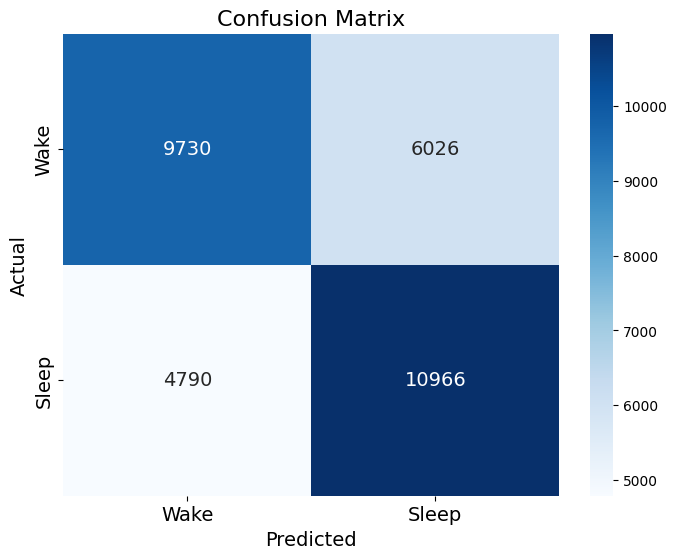

In [ ]:
#plot the confusion matrix plot for train data
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = final_confusion_matrix_5cv

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'Sleep'], yticklabels=['Wake', 'Sleep'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

### Feature Importance

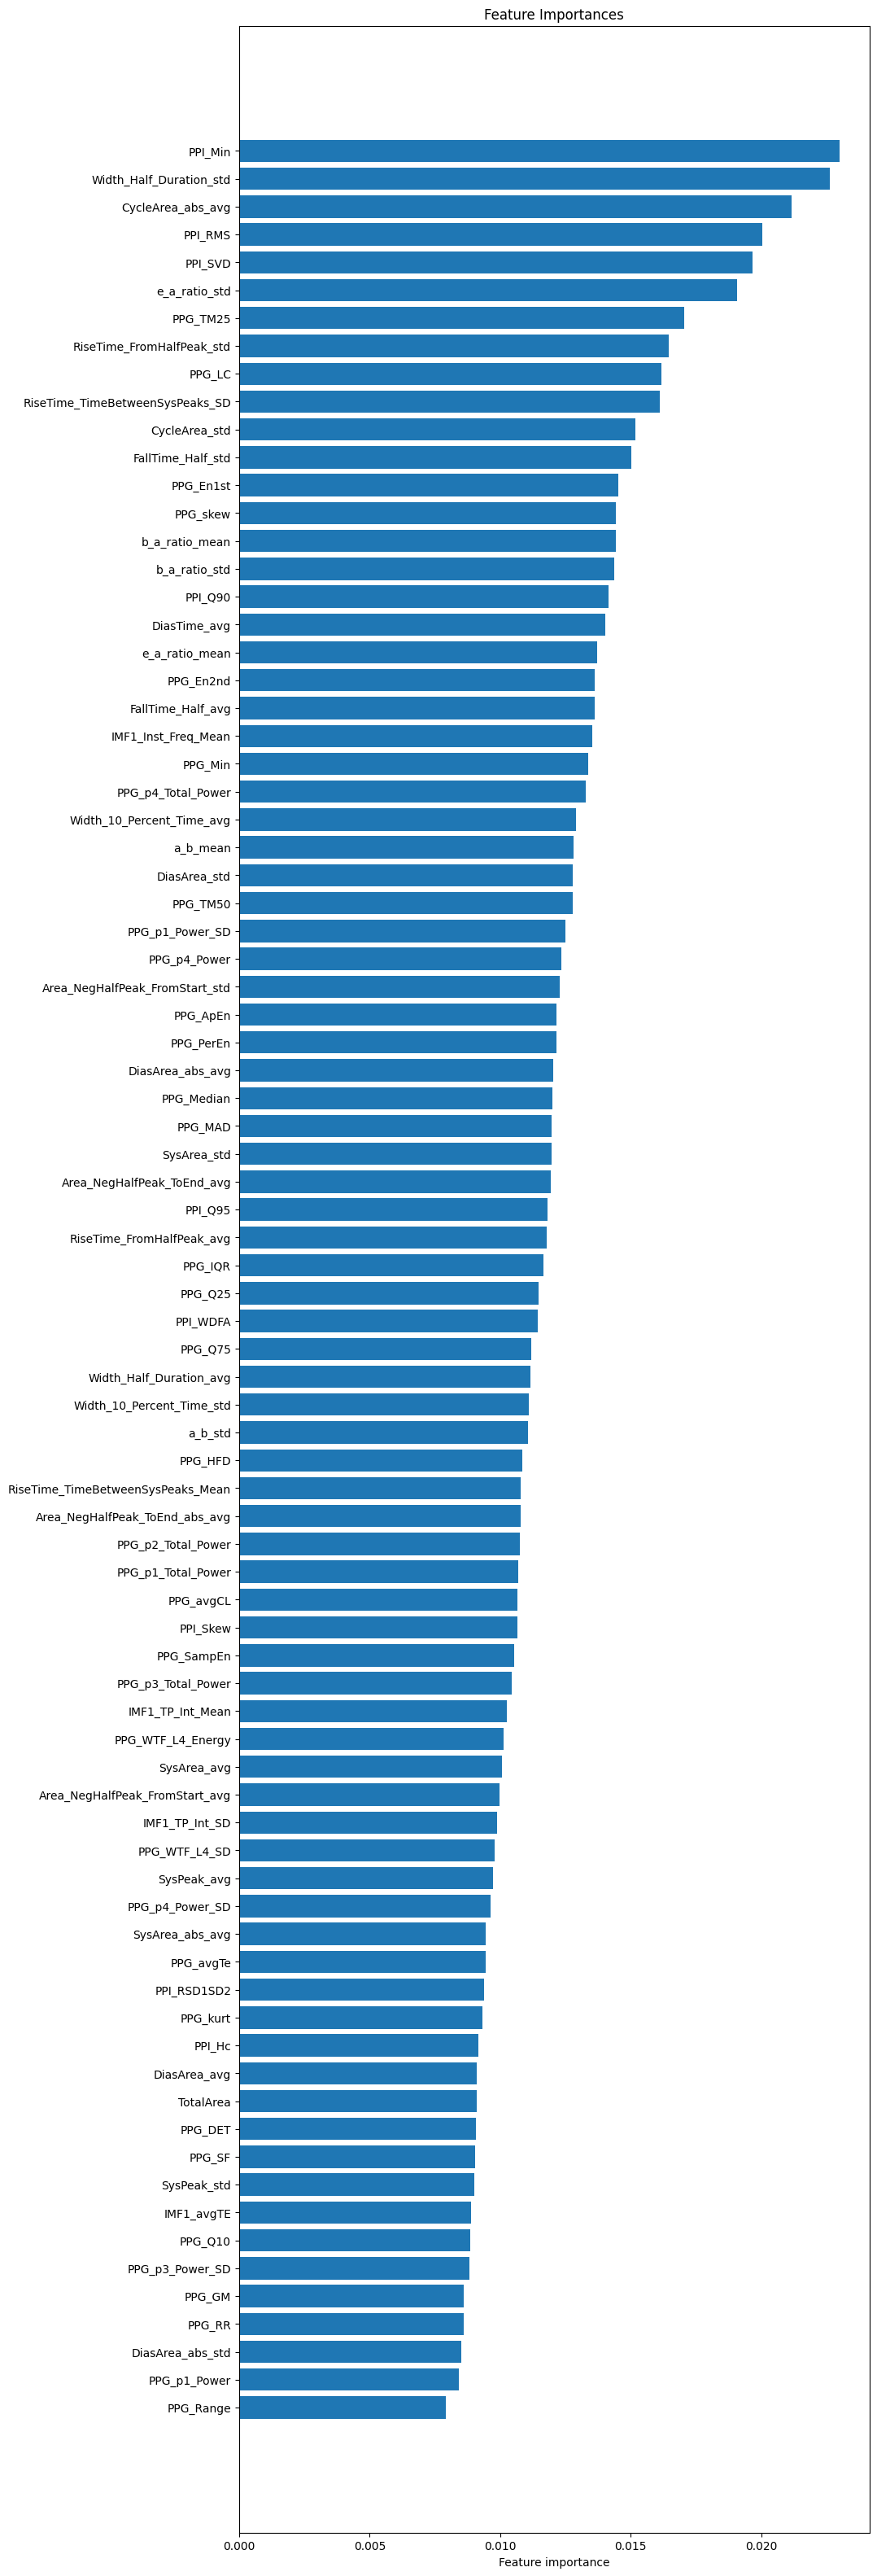

In [ ]:
# Assuming 'pipeline' is already fitted and contains the RandomForestClassifier
rf_model = pipeline.named_steps['classifier']

# Get feature importances
feature_importances_cv5 = rf_model.feature_importances_

# Create a DataFrame for easy visualization
# Assuming that 'X_train' has the same columns as 'X' used in cross-validation
importance_df_cv5 = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': feature_importances_cv5
}).sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 40))
plt.barh(importance_df_cv5['Feature'], importance_df_cv5['Importance'])
plt.xlabel('Feature importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


Top 10 Most Important Features:
                            Feature  Importance
68                          PPI_Min    0.022992
22          Width_Half_Duration_std    0.022636
12                CycleArea_abs_avg    0.021168
67                          PPI_RMS    0.020046
74                          PPI_SVD    0.019665
32                    e_a_ratio_std    0.019066
35                         PPG_TM25    0.017044
18        RiseTime_FromHalfPeak_std    0.016437
78                           PPG_LC    0.016180
26  RiseTime_TimeBetweenSysPeaks_SD    0.016112
11                    CycleArea_std    0.015164
20                FallTime_Half_std    0.015019
65                        PPG_En1st    0.014527
45                         PPG_skew    0.014430
29                   b_a_ratio_mean    0.014427
30                    b_a_ratio_std    0.014354
69                          PPI_Q90    0.014155
6                      DiasTime_avg    0.014013
31                   e_a_ratio_mean    0.013705
66      

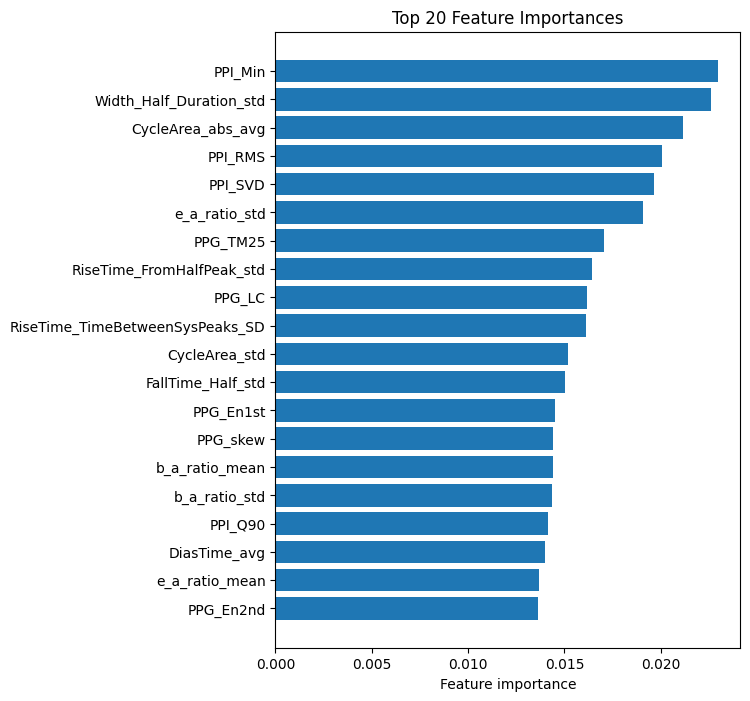

In [ ]:
# Assuming 'pipeline' is already fitted and contains the RandomForestClassifier
rf_model = pipeline.named_steps['classifier']

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for easy visualization
# Assuming that 'X_train' has the same columns as 'X' used in cross-validation
importance_df = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False).head(20)  # Select only the top 10 features

# Print the top 10 most important features
print("Top 10 Most Important Features:")
print(importance_df)

# Optional: plot the top 10 features for visual representation
plt.figure(figsize=(6, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature importance')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

# 10-fold CV

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict


# Define your classifier with the best parameters found
rf_classifier = RandomForestClassifier(
    bootstrap=True,
    max_depth=16,
    max_features='log2',
    min_samples_leaf=10,
    min_samples_split=4,
    n_estimators=500,
    random_state=42
)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=10)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Initialize the confusion matrix
final_confusion_matrix_10cv = np.zeros((2, 2), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_10cv += confusion_matrix(y_test, y_pred)

     # Unpack confusion matrix to calculate specificity
    TN, FP, FN, TP = fold_confusion_matrix.ravel()

    # Calculate metrics for the fold
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred)
    fold_specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    fold_precision = precision_score(y_test, y_pred)
    fold_f1 = f1_score(y_test, y_pred)
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(fold_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)

# Convert the metrics dictionary to a DataFrame
metrics_df_10cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_10cv = metrics_df_10cv.mean()
metrics_std_10cv = metrics_df_10cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_10cv)
print(metrics_std_10cv)

# Calculate overall metrics from the total confusion matrix
TN, FP, FN, TP = final_confusion_matrix_10cv.ravel()
overall_accuracy = (TP + TN) / (TP + FP + FN + TN)
overall_sensitivity = TP / (TP + FN)
overall_specificity = TN / (TN + FP)
overall_precision = TP / (TP + FP)
overall_f1 = 2 * (overall_precision * overall_sensitivity) / (overall_precision + overall_sensitivity)
overall_mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

# Print the final confusion matrix and overall metrics
print('Final Confusion Matrix:\n', final_confusion_matrix_10cv)
print('Overall Accuracy:', overall_accuracy)
print('Overall Sensitivity (Recall):', overall_sensitivity)
print('Overall Specificity:', overall_specificity)
print('Overall Precision:', overall_precision)
print('Overall F1 Score:', overall_f1)
print('Overall MCC:', overall_mcc)

Accuracy       0.650218
Sensitivity    0.677955
Specificity    0.622482
Precision      0.651201
F1 Score       0.658167
MCC            0.307071
dtype: float64
Accuracy       0.050535
Sensitivity    0.097649
Specificity    0.129301
Precision      0.070575
F1 Score       0.048716
MCC            0.103250
dtype: float64
Final Confusion Matrix:
 [[ 9807  5949]
 [ 5074 10682]]
Overall Accuracy: 0.6501967504442752
Overall Sensitivity (Recall): 0.677963950241178
Overall Specificity: 0.6224295506473724
Overall Precision: 0.6422945102519392
Overall F1 Score: 0.6596473893846296
Overall MCC: 0.3008577923180626


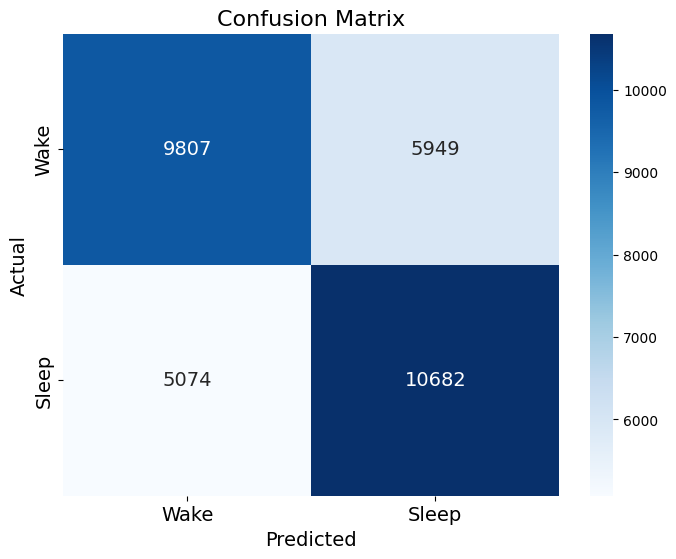

In [ ]:
#plot the confusion matrix plot for train data
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = final_confusion_matrix_10cv

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'Sleep'], yticklabels=['Wake', 'Sleep'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

Top 10 Most Important Features:
                      Feature  Importance
68                    PPI_Min    0.020837
22    Width_Half_Duration_std    0.020507
35                   PPG_TM25    0.018379
32              e_a_ratio_std    0.018243
78                     PPG_LC    0.016755
29             b_a_ratio_mean    0.016381
18  RiseTime_FromHalfPeak_std    0.016357
45                   PPG_skew    0.016053
27                   a_b_mean    0.015865
66                  PPG_En2nd    0.015740
12          CycleArea_abs_avg    0.015708
33                    PPG_Min    0.015563
67                    PPI_RMS    0.015379
9            DiasArea_abs_avg    0.015356
57         PPG_p4_Total_Power    0.015265
20          FallTime_Half_std    0.015160
11              CycleArea_std    0.014874
30              b_a_ratio_std    0.014872
17  RiseTime_FromHalfPeak_avg    0.014735
58        IMF1_Inst_Freq_Mean    0.014542


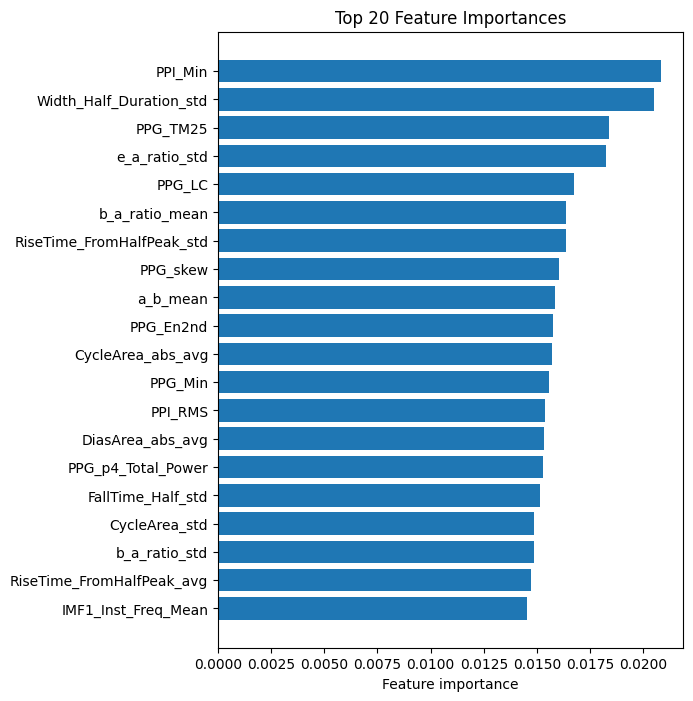

In [ ]:
# Assuming 'pipeline' is already fitted and contains the RandomForestClassifier
rf_model = pipeline.named_steps['classifier']

# Get feature importances
feature_importances_cv10 = rf_model.feature_importances_

# Create a DataFrame for easy visualization
# Assuming that 'X_train' has the same columns as 'X' used in cross-validation
importance_df = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': feature_importances_cv10
}).sort_values('Importance', ascending=False).head(20)  # Select only the top 10 features

# Print the top 10 most important features
print("Top 10 Most Important Features:")
print(importance_df)

# Optional: plot the top 10 features for visual representation
plt.figure(figsize=(6, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature importance')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

In [ ]:
importance_df_10cv = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': feature_importances_cv10
}).sort_values('Importance', ascending=False)

importance_df_10cv

,Feature,Importance
68,PPI_Min,0.020837
22,Width_Half_Duration_std,0.020507
35,PPG_TM25,0.018379
32,e_a_ratio_std,0.018243
78,PPG_LC,0.016755
...,...,...
73,PPI_Skew,0.008820
38,PPG_Range,0.008600
49,PPG_p1_Power,0.008501
52,PPG_p3_Power_SD,0.008349


# 20-fold CV

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict


# Define your classifier with the best parameters found
rf_classifier = RandomForestClassifier(
    bootstrap=True,
    max_depth=16,
    max_features='log2',
    min_samples_leaf=10,
    min_samples_split=4,
    n_estimators=500,
    random_state=42
)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=20)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Initialize the confusion matrix
final_confusion_matrix_20cv = np.zeros((2, 2), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_20cv += confusion_matrix(y_test, y_pred)

     # Unpack confusion matrix to calculate specificity
    TN, FP, FN, TP = fold_confusion_matrix.ravel()

    # Calculate metrics for the fold
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred)
    fold_specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    fold_precision = precision_score(y_test, y_pred)
    fold_f1 = f1_score(y_test, y_pred)
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(fold_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)

# Convert the metrics dictionary to a DataFrame
metrics_df_20cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_20cv = metrics_df_20cv.mean()
metrics_std_20cv = metrics_df_20cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_20cv)
print(metrics_std_20cv)

# Calculate overall metrics from the total confusion matrix
TN, FP, FN, TP = final_confusion_matrix_10cv.ravel()
overall_accuracy = (TP + TN) / (TP + FP + FN + TN)
overall_sensitivity = TP / (TP + FN)
overall_specificity = TN / (TN + FP)
overall_precision = TP / (TP + FP)
overall_f1 = 2 * (overall_precision * overall_sensitivity) / (overall_precision + overall_sensitivity)
overall_mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

# Print the final confusion matrix and overall metrics
print('Final Confusion Matrix:\n', final_confusion_matrix_10cv)
print('Overall Accuracy:', overall_accuracy)
print('Overall Sensitivity (Recall):', overall_sensitivity)
print('Overall Specificity:', overall_specificity)
print('Overall Precision:', overall_precision)
print('Overall F1 Score:', overall_f1)
print('Overall MCC:', overall_mcc)

Test set distribution: 2_stages
0    837
1    837
Name: count, dtype: int64
Test set distribution: 2_stages
0    802
1    802
Name: count, dtype: int64
Test set distribution: 2_stages
0    773
1    773
Name: count, dtype: int64
Test set distribution: 2_stages
0    780
1    780
Name: count, dtype: int64
Test set distribution: 2_stages
0    775
1    775
Name: count, dtype: int64
Test set distribution: 2_stages
0    792
1    792
Name: count, dtype: int64
Test set distribution: 2_stages
0    791
1    791
Name: count, dtype: int64
Test set distribution: 2_stages
0    792
1    792
Name: count, dtype: int64
Test set distribution: 2_stages
0    785
1    785
Name: count, dtype: int64
Test set distribution: 2_stages
0    789
1    789
Name: count, dtype: int64
Test set distribution: 2_stages
0    797
1    797
Name: count, dtype: int64
Test set distribution: 2_stages
0    778
1    778
Name: count, dtype: int64
Test set distribution: 2_stages
0    772
1    772
Name: count, dtype: int64
Test set dis

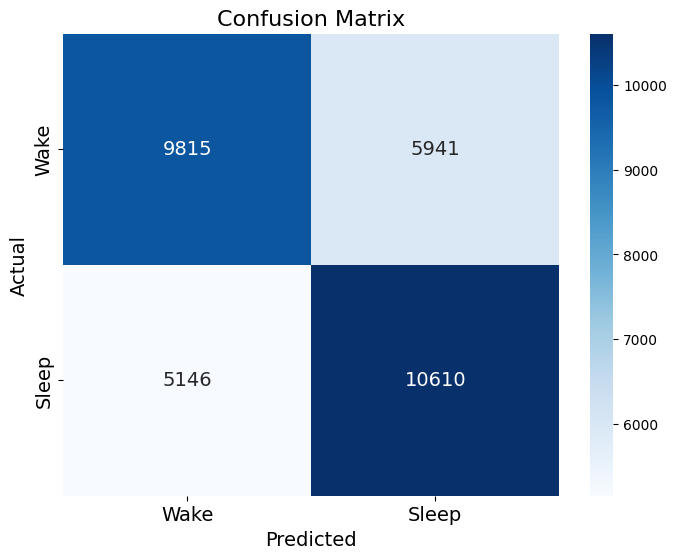

In [ ]:
#plot the confusion matrix plot for train data
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = final_confusion_matrix_20cv

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'Sleep'], yticklabels=['Wake', 'Sleep'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

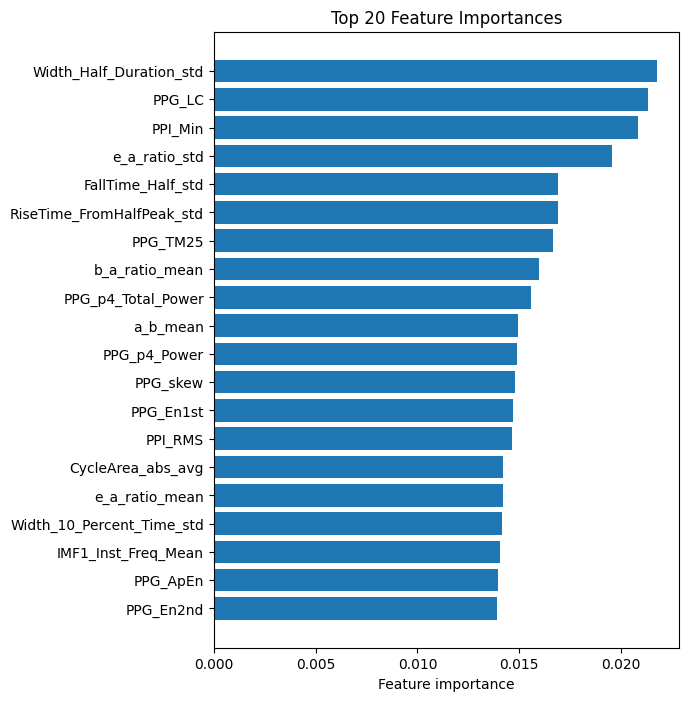

In [ ]:
# Assuming 'pipeline' is already fitted and contains the RandomForestClassifier
rf_model = pipeline.named_steps['classifier']

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for easy visualization
# Assuming that 'X_train' has the same columns as 'X' used in cross-validation
importance_df_20cv = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False).head(20)  # Select only the top 10 features

# Optional: plot the top 10 features for visual representation
plt.figure(figsize=(6, 8))
plt.barh(importance_df_20cv['Feature'], importance_df_20cv['Importance'])
plt.xlabel('Feature importance')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

In [ ]:
importance_df_20cv = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

importance_df_20cv

,Feature,Importance
22,Width_Half_Duration_std,0.021752
78,PPG_LC,0.021341
68,PPI_Min,0.020828
32,e_a_ratio_std,0.019571
20,FallTime_Half_std,0.016918
...,...,...
47,PPG_SF,0.008721
48,PPG_GM,0.008689
40,PPG_Q10,0.008656
49,PPG_p1_Power,0.008515


# Feature importances

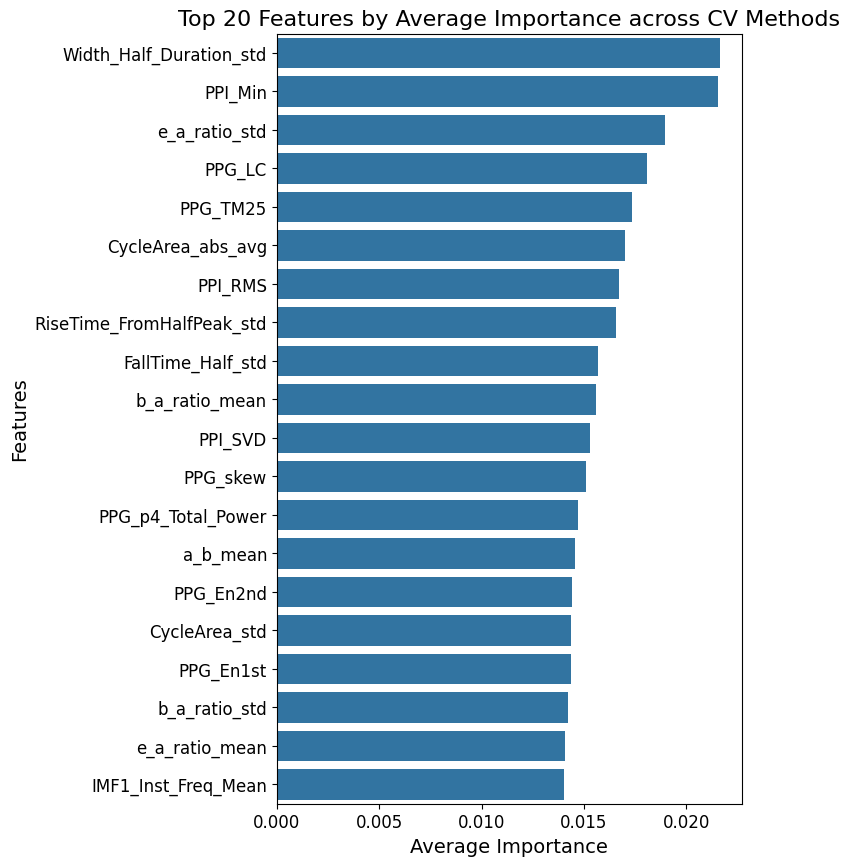

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrames are already read and named importance_df_10cv, importance_df_5cv, and importance_df_20cv

# Now, calculate the mean importance across the three DataFrames
mean_importance_df = pd.concat([importance_df_10cv, importance_df_cv5, importance_df_20cv], axis=1).mean(axis=1)

# Reset the index to turn the features back into a column
mean_importance_df = mean_importance_df.reset_index().rename(columns={0: 'Importance'})

# Sort the DataFrame by importance and take the top 10 features
top_10_features = mean_importance_df.nlargest(20, 'Importance')

# Now, plot the barplot of the top 10 features
plt.figure(figsize=(6, 10))
barplot = sns.barplot(data=top_10_features, x='Importance', y='Feature')

# Adding plot details
plt.title('Top 20 Features by Average Importance across CV Methods', fontsize=16)
plt.xlabel('Average Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Show the plot
plt.show()


In [ ]:
top_20_features = X_resampled[['Width_Half_Duration_std', 'PPI_Min', 'e_a_ratio_std', 'PPG_LC', 'PPG_TM25', 'CycleArea_abs_avg', 'PPI_RMS', 'RiseTime_FromHalfPeak_std', 'FallTime_Half_std', 'b_a_ratio_mean', 'PPI_SVD', 'PPG_skew', 'PPG_p4_Total_Power', 'a_b_mean', 'PPG_En2nd', 'CycleArea_std', 'PPG_En1st', 'b_a_ratio_std', 'e_a_ratio_mean', 'IMF1_Inst_Freq_Mean']]

In [ ]:
top_20_features

,Width_Half_Duration_std,PPI_Min,e_a_ratio_std,PPG_LC,PPG_TM25,CycleArea_abs_avg,PPI_RMS,RiseTime_FromHalfPeak_std,FallTime_Half_std,b_a_ratio_mean,PPI_SVD,PPG_skew,PPG_p4_Total_Power,a_b_mean,PPG_En2nd,CycleArea_std,PPG_En1st,b_a_ratio_std,e_a_ratio_mean,IMF1_Inst_Freq_Mean
0,0.070160,554.6875,0.102872,56.679685,-0.047028,0.449604,658.248547,0.025383,0.045370,-1.267492,4342.028380,0.428565,0.003861,-0.004421,0.989471,14.887894,0.990671,0.210163,0.490693,1.697493
1,0.266984,546.8750,0.156112,59.669821,0.010188,0.522684,779.166667,0.178933,0.133449,-1.211870,4368.549933,0.014791,0.016921,-0.001661,0.993025,33.482002,0.998040,0.308005,0.477651,2.564787
2,0.090760,531.2500,0.179366,61.623213,-0.014213,0.529929,695.898438,0.042987,0.069931,-1.208228,4421.909507,0.021181,0.000885,-0.002667,0.993246,39.961905,0.988593,0.230212,0.475801,1.864098
3,0.366583,390.6250,0.308429,62.408353,-0.000748,0.711210,796.875000,0.272336,0.241228,-1.237407,4108.364895,-0.058644,0.040516,-0.000317,0.999080,33.056040,0.998650,0.487083,0.536024,2.264550
4,0.112018,648.4375,0.081728,56.876811,-0.086886,0.663696,700.892857,0.077414,0.058262,-1.126005,4159.743597,0.561696,0.001835,-0.002871,0.984302,21.932653,0.979466,0.145918,0.347579,1.393989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31507,0.034110,671.8750,0.084715,55.243114,-0.145765,0.834062,986.689815,0.015800,0.024115,-0.956509,5227.105493,0.926690,0.002538,0.000800,0.999646,10.190085,0.972276,0.046379,0.631523,1.196569
31508,0.030863,718.7500,0.055726,48.968283,-0.143406,0.985708,1096.946023,0.011076,0.021190,-0.807127,5222.485331,0.843397,0.001350,0.002928,0.999767,9.175974,0.937216,0.044699,0.487070,0.964317
31509,0.033063,734.3750,0.071912,50.691922,-0.155191,0.945327,1122.721354,0.015376,0.020729,-0.818092,5617.709034,0.883014,0.001394,0.002681,0.999709,10.385429,0.920023,0.060512,0.504010,0.799335
31510,0.051945,656.2500,0.087411,52.478343,-0.144915,0.870003,1037.259615,0.018867,0.039797,-0.924476,5410.617365,0.896913,0.001982,0.001333,0.999629,11.942009,0.967628,0.051484,0.596708,0.935191


<ipython-input-22-68ab2b6a01fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_features['class']= top_20_features['class'].map(class_mapping)


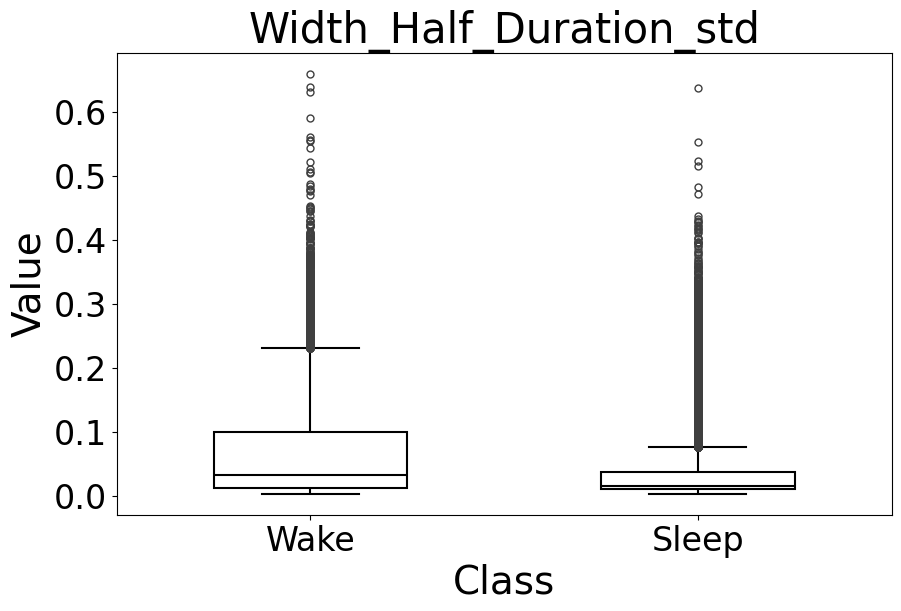

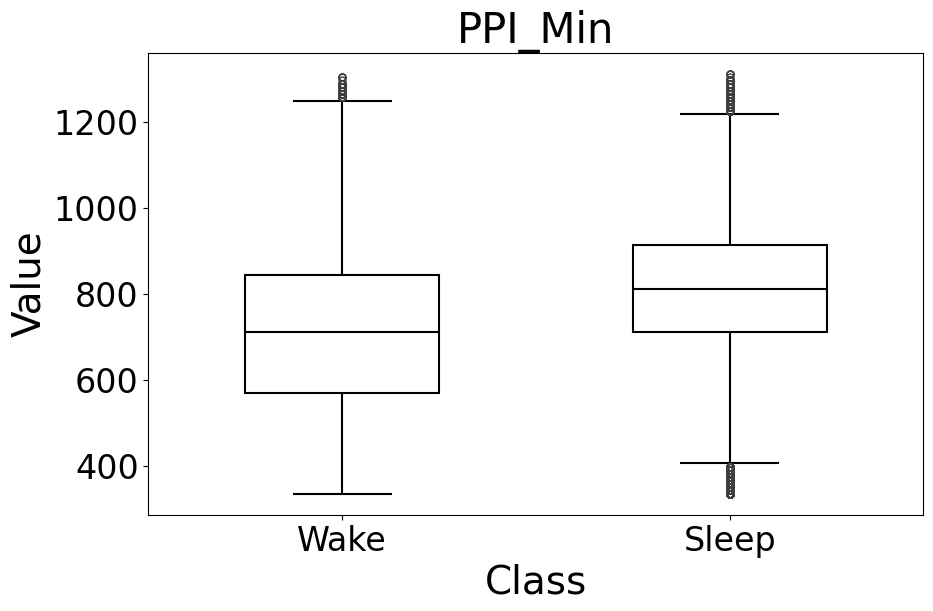

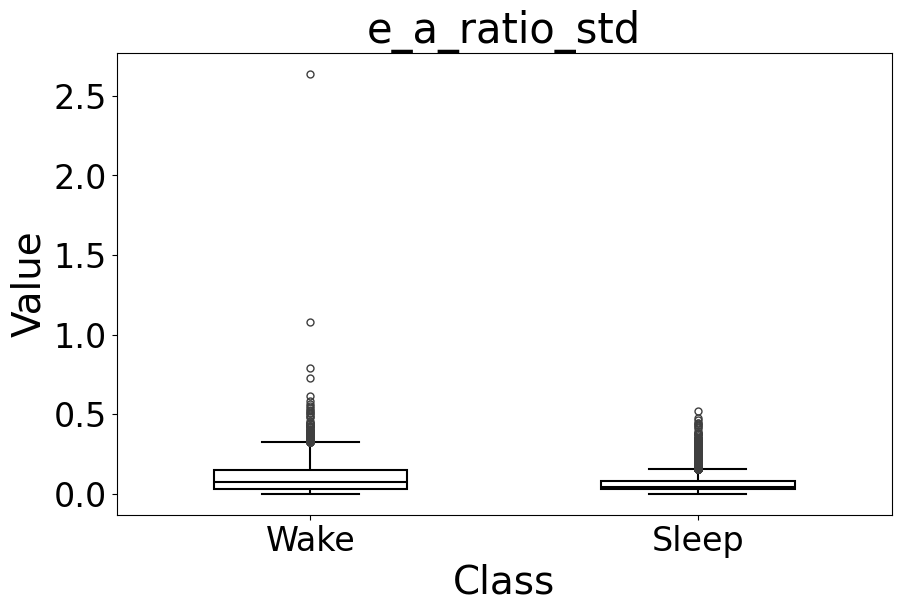

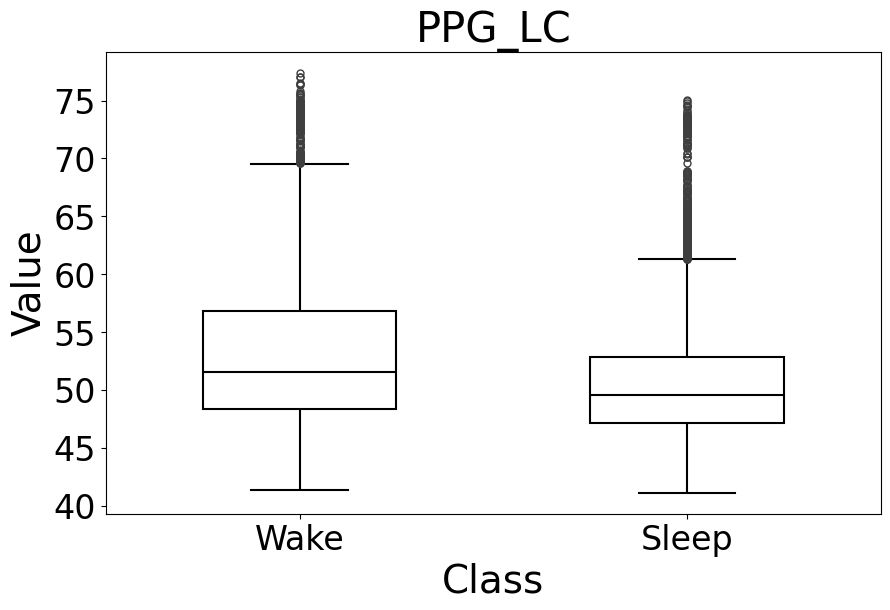

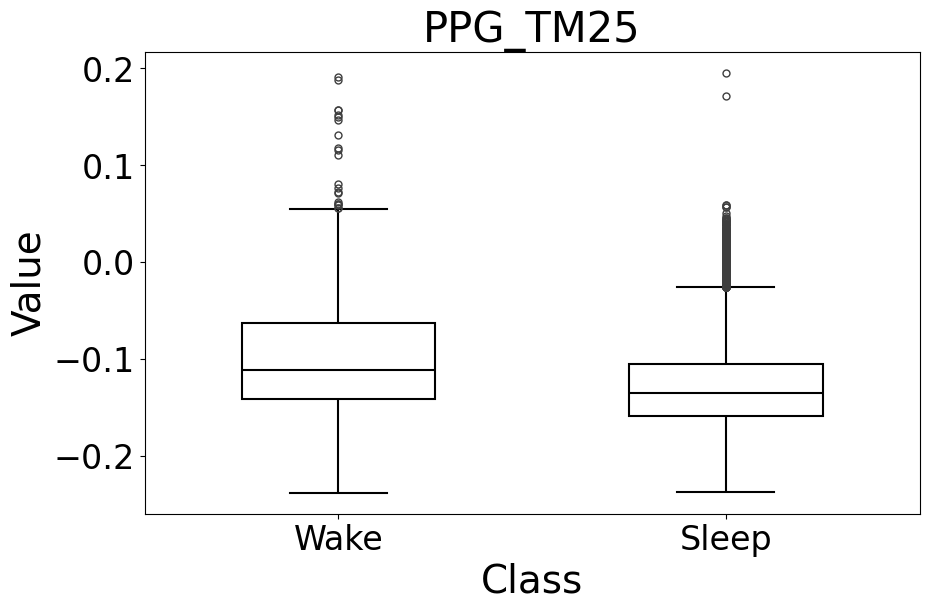

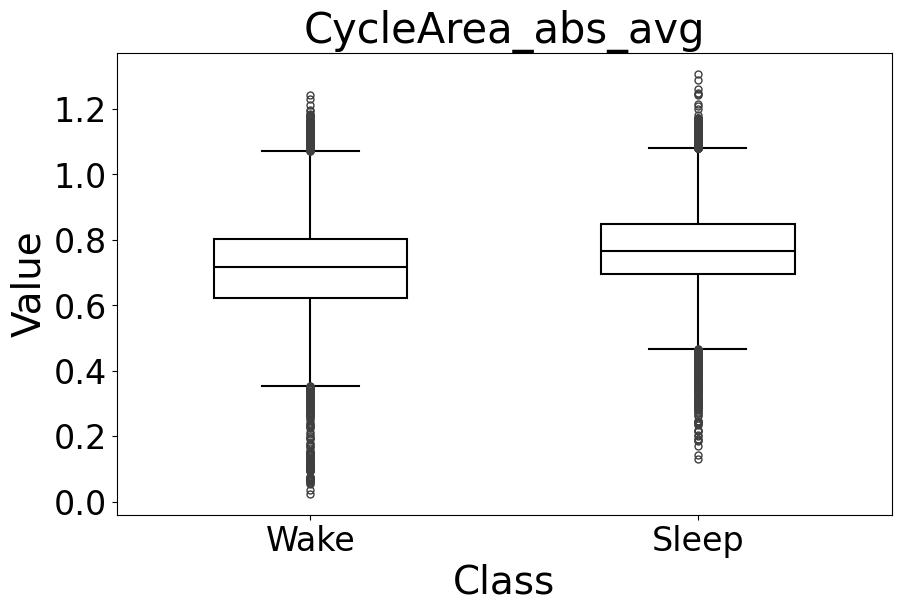

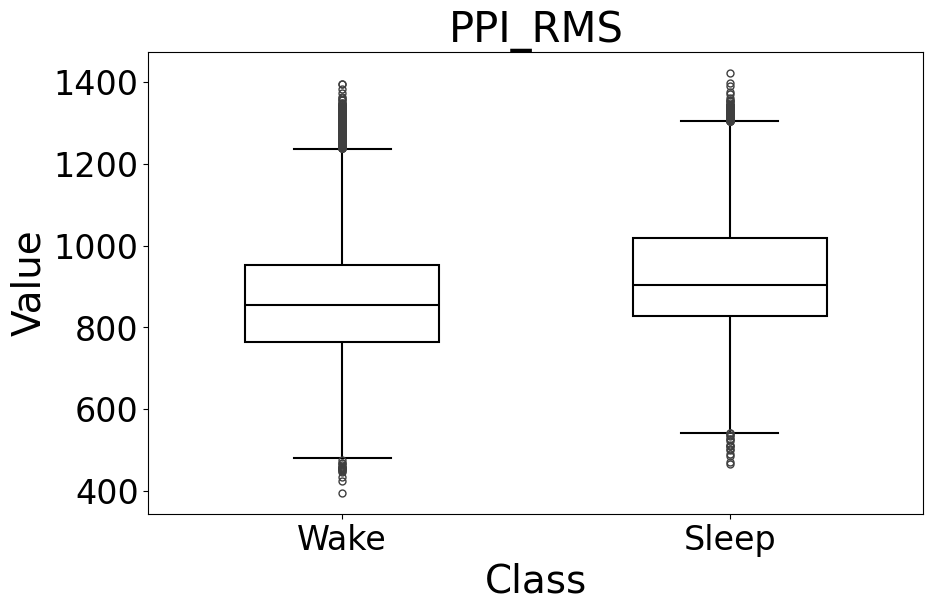

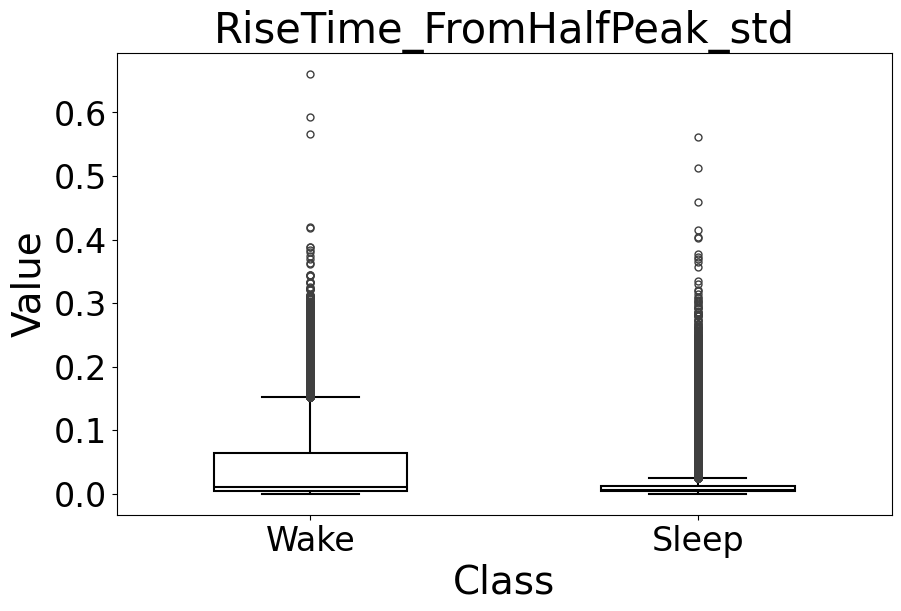

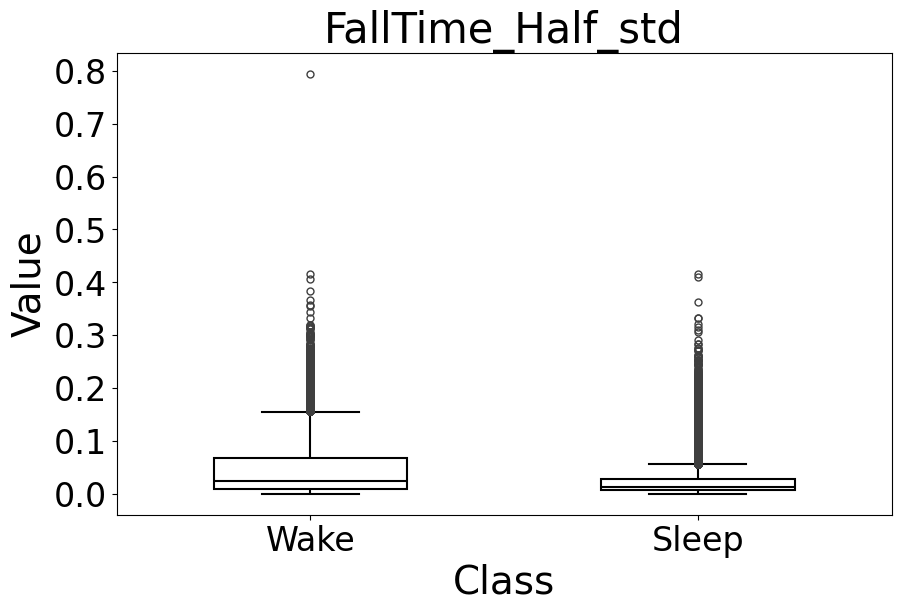

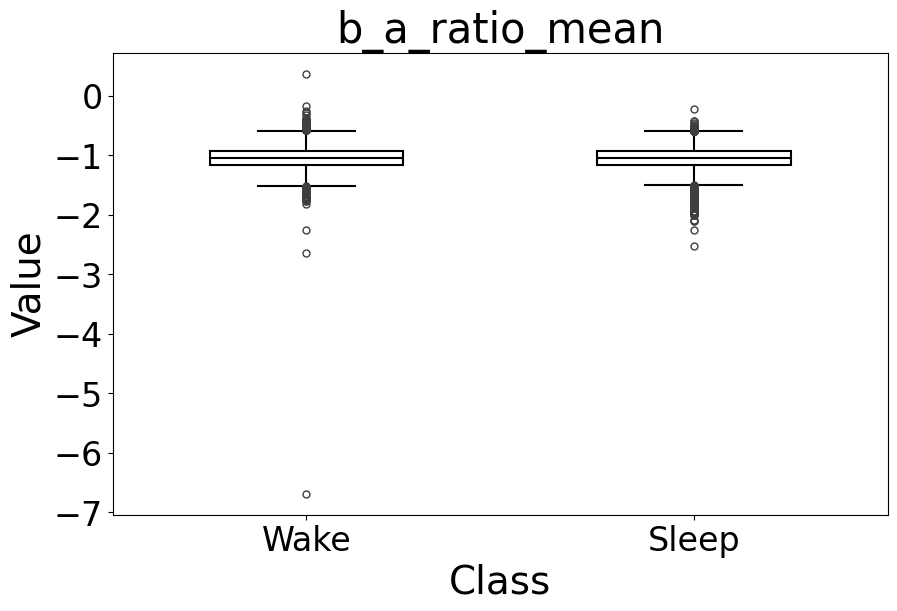

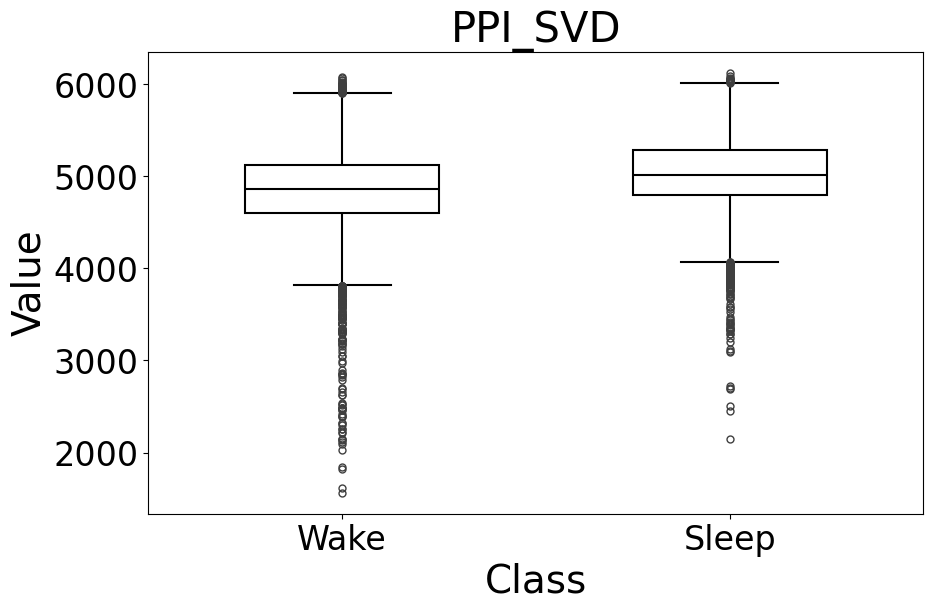

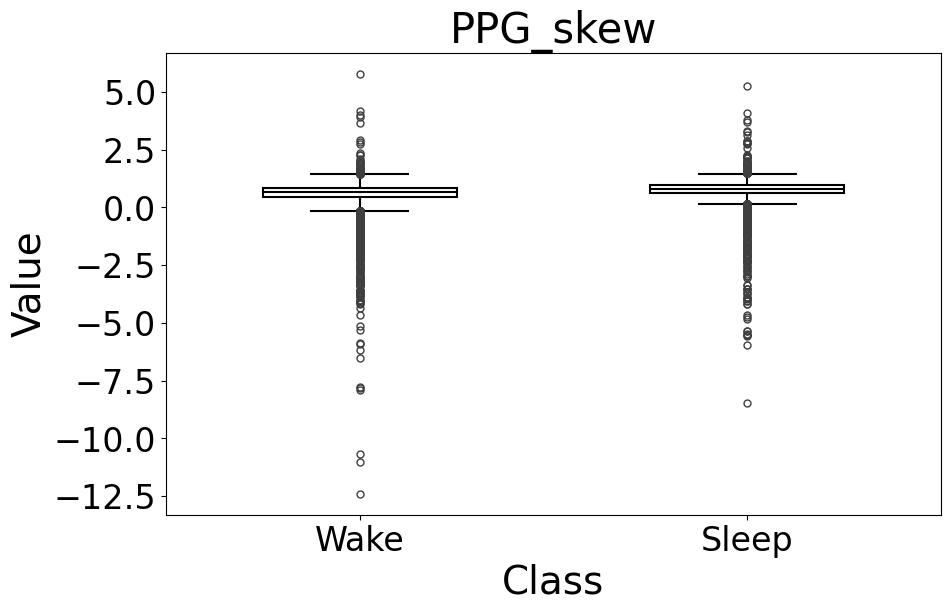

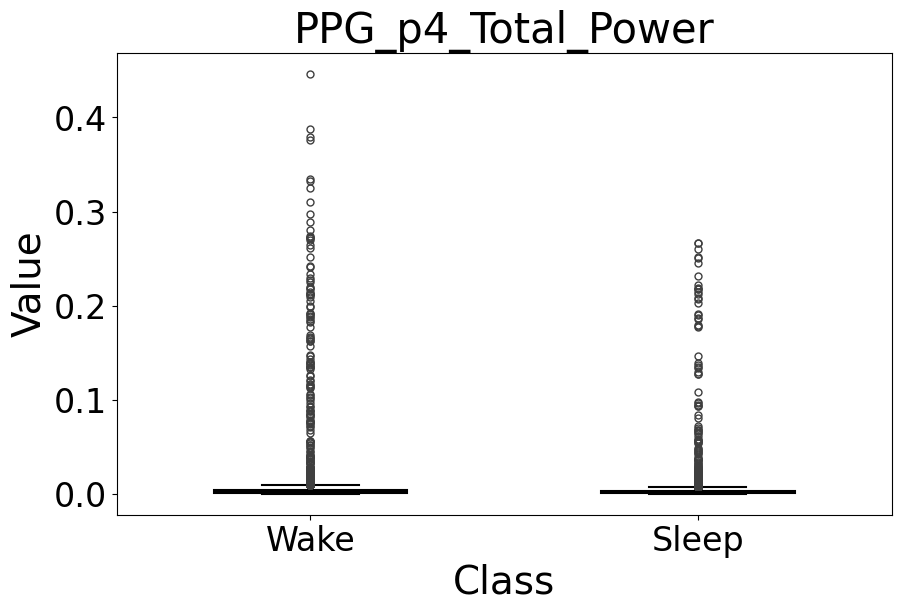

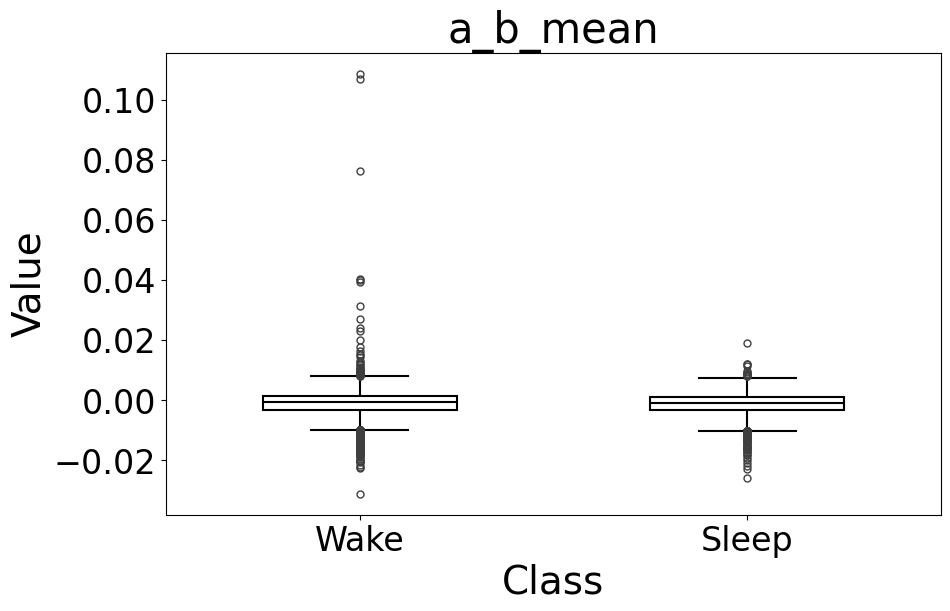

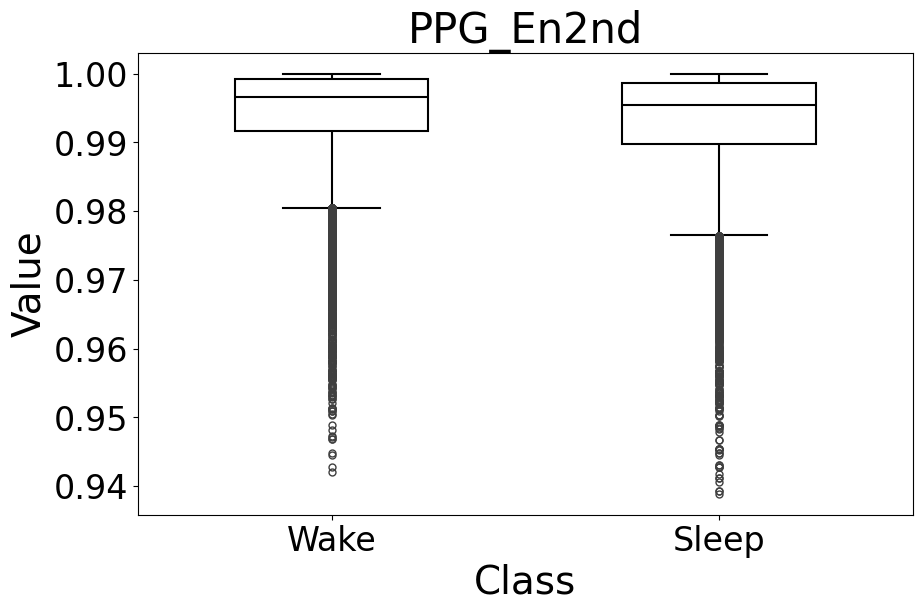

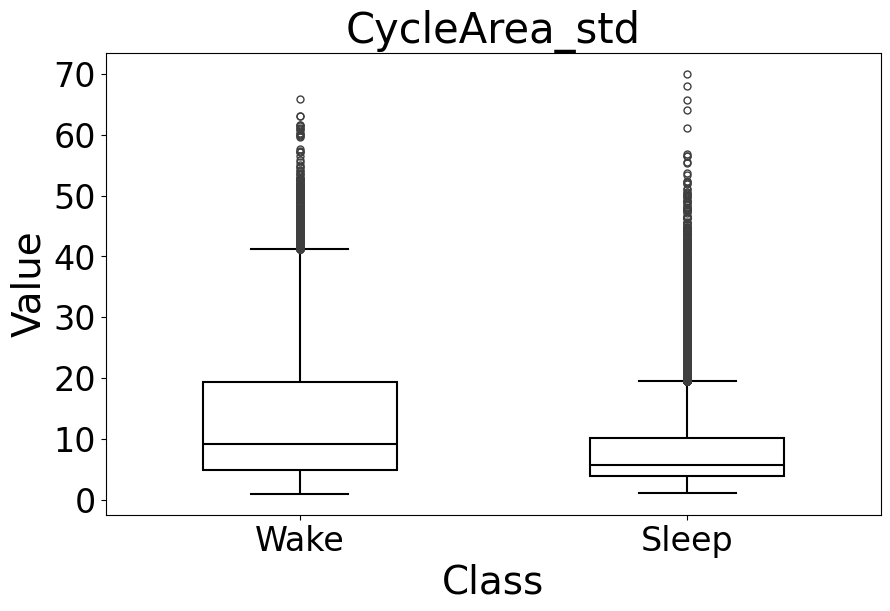

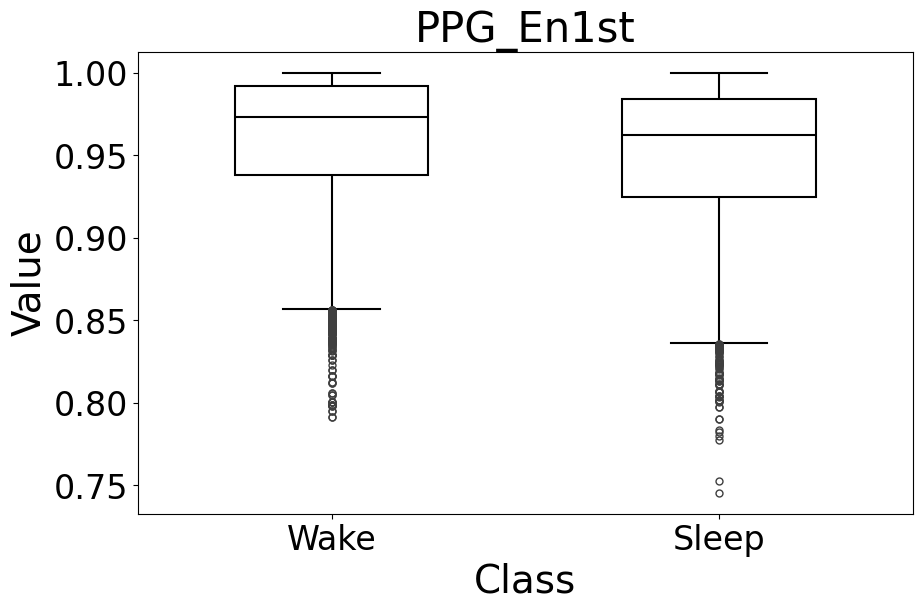

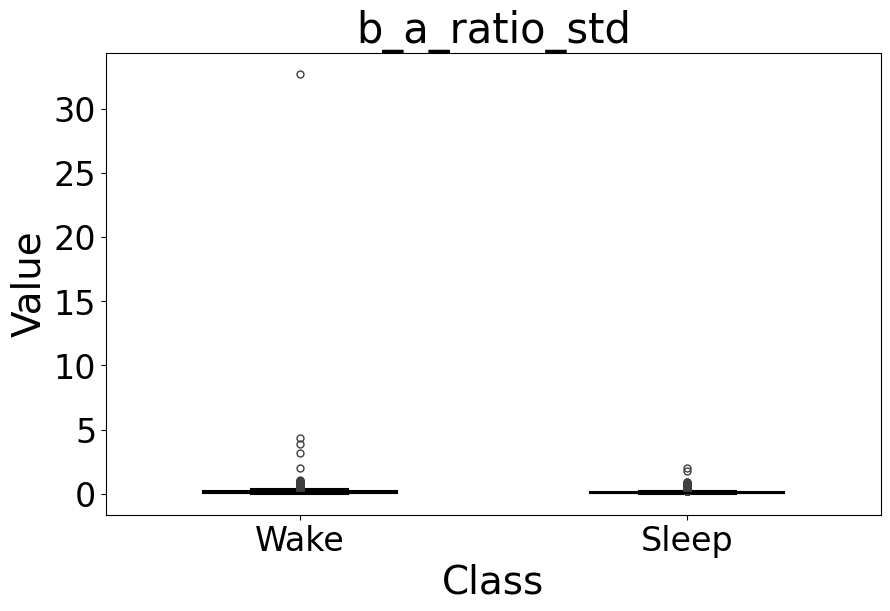

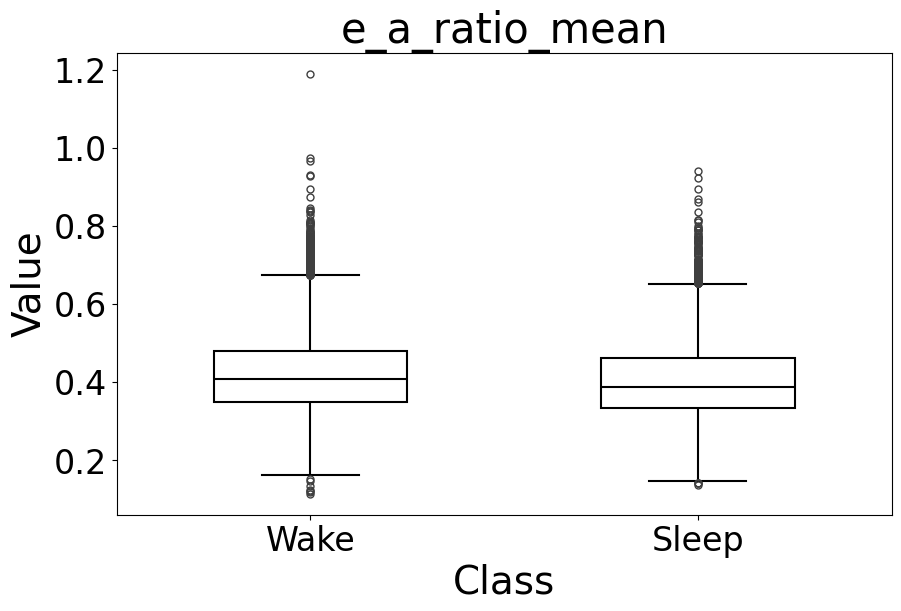

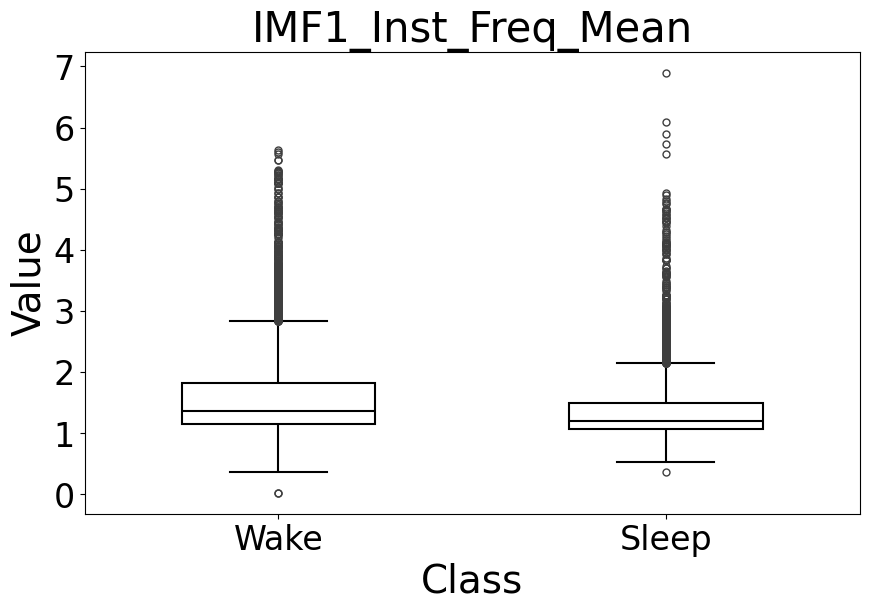

In [ ]:
class_mapping = {0: "Wake", 1: "Sleep"}  # Make sure to include all original classes
top_20_features['class']= top_20_features['class'].map(class_mapping)

# Assuming top_20_features is your DataFrame
feature_names = top_20_features.drop(columns='class').columns  # Exclude 'class' column from features

for feature in feature_names:
    plt.figure(figsize=(10, 6))
    # Create a boxplot with correctly specified properties
    sns.boxplot(x='class', y=feature, data=top_20_features,
                width=0.5,  # Box width
                fliersize=5,  # Outlier marker size
                linewidth=1.5,  # Line width of the boxes
                boxprops={'facecolor': 'white', 'edgecolor': 'black'},  # Box fill and edge color
                whiskerprops={'color': 'black'},  # Whisker color
                capprops={'color': 'black'},  # Caps color
                medianprops={'color': 'black'})  # Median line color

    plt.title(f'{feature}', fontsize=30)
    plt.xlabel('Class', fontsize=28)
    plt.ylabel('Value', fontsize=28)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)

    plt.show()

<ipython-input-19-9a0b1611ec20>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_features['class'] = y_resampled  # Add the class labels


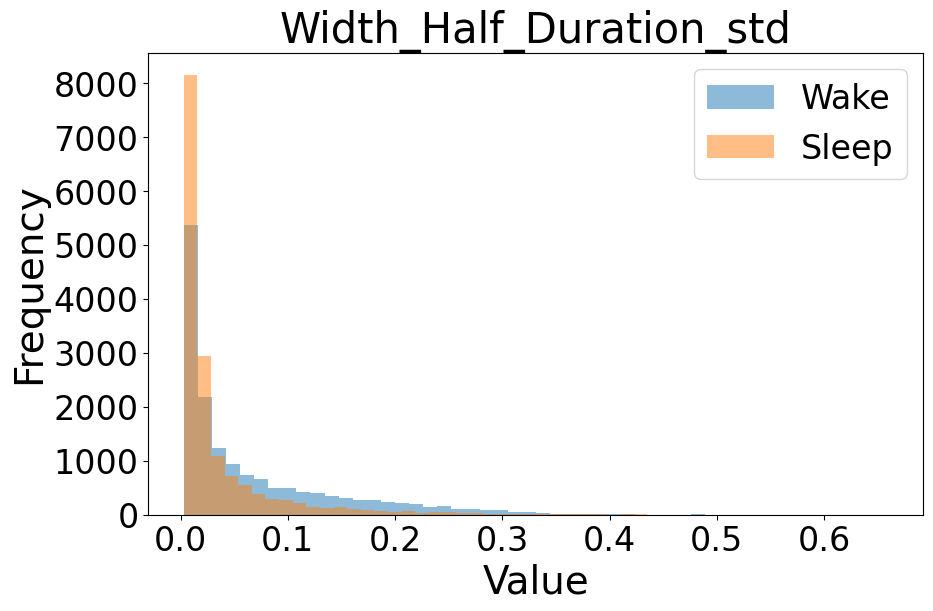

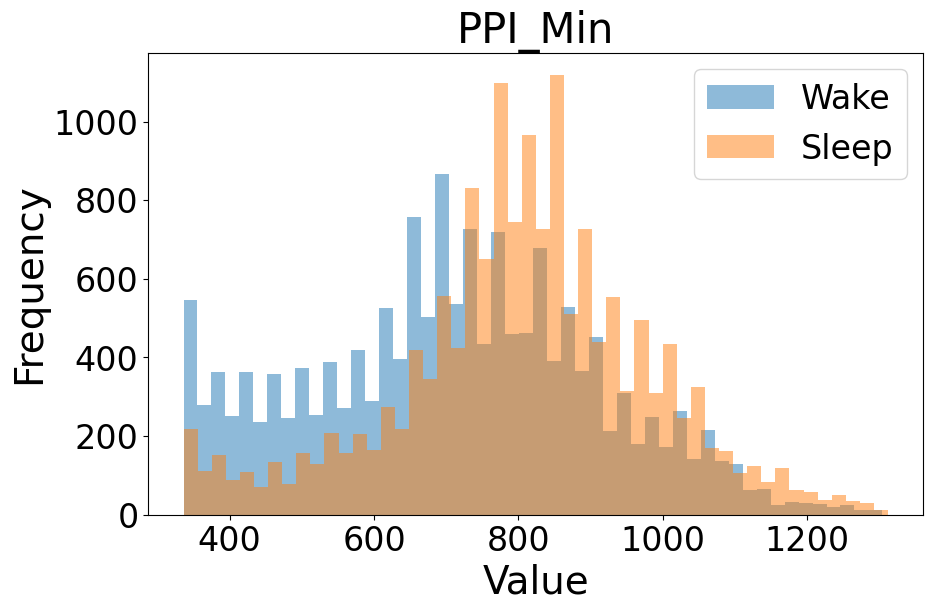

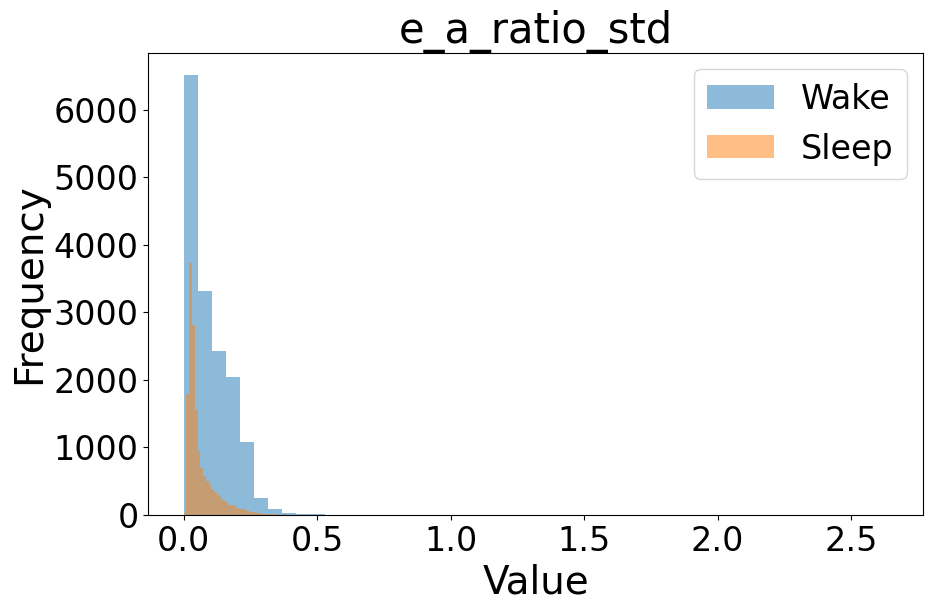

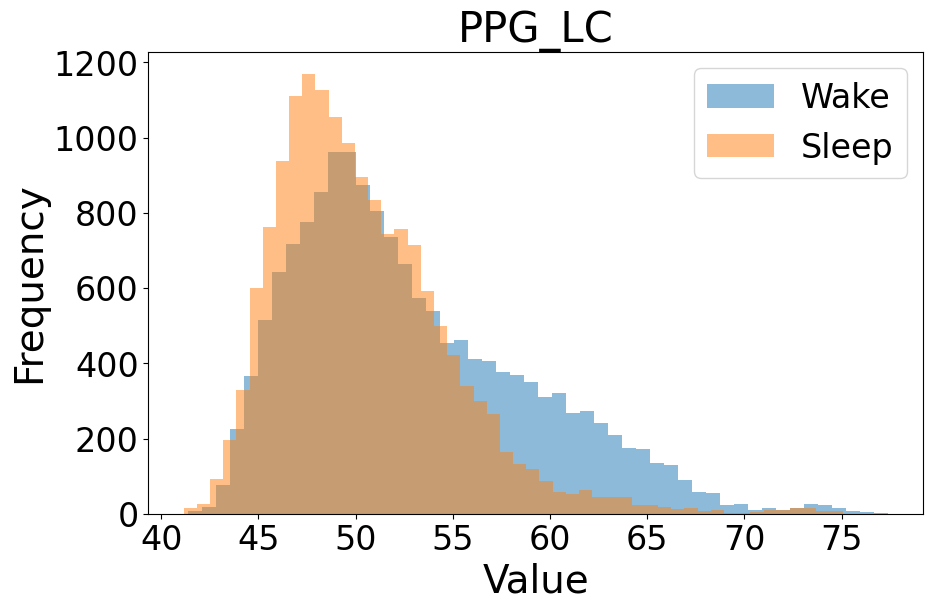

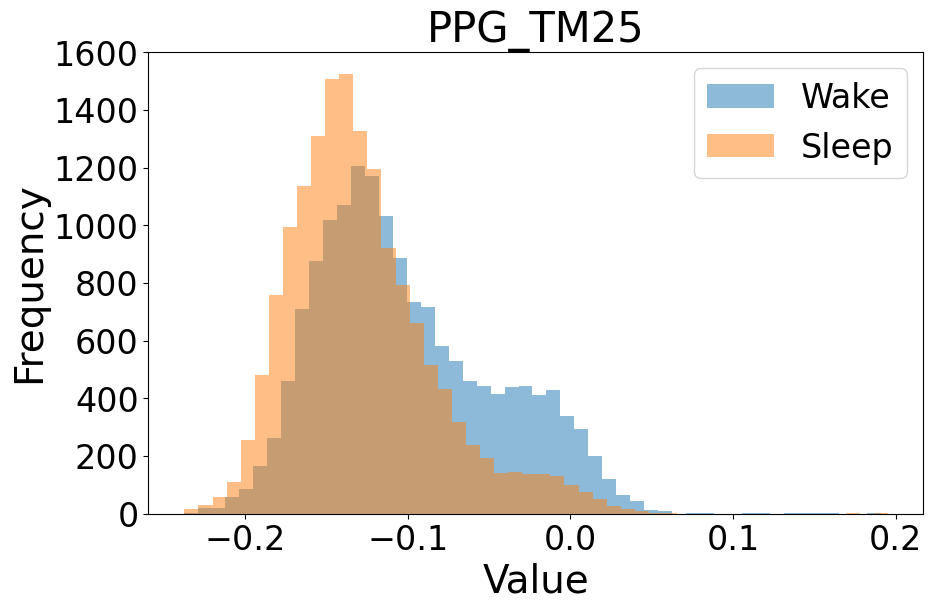

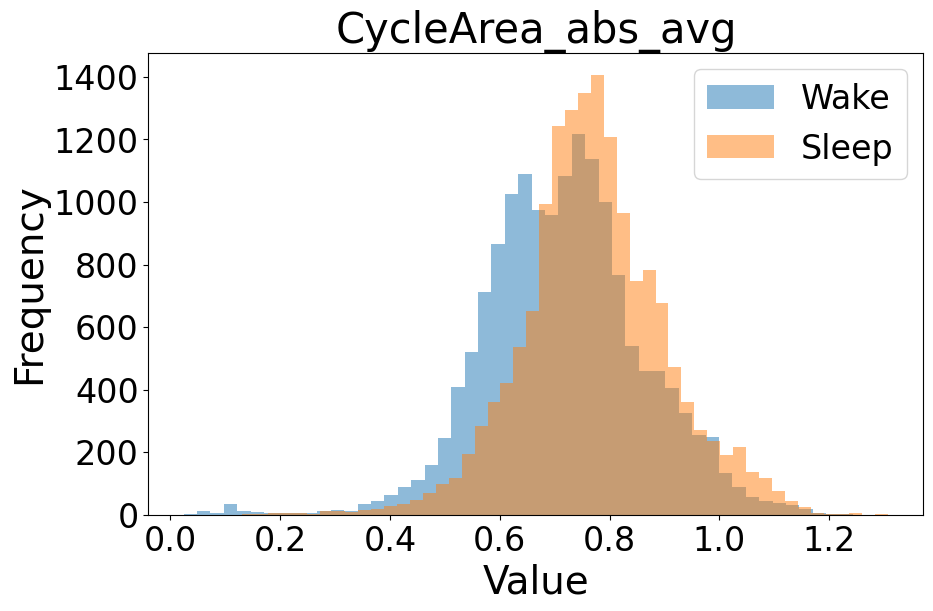

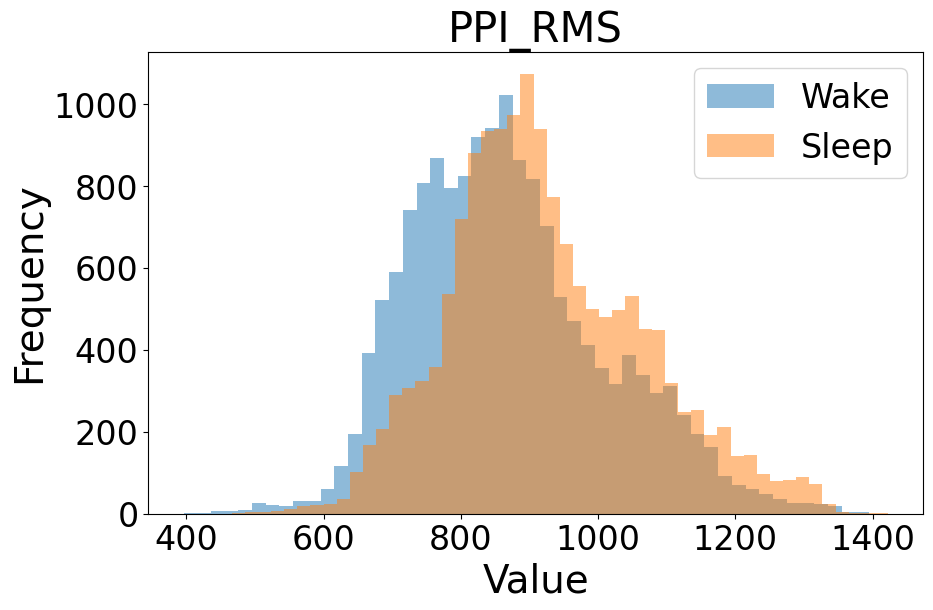

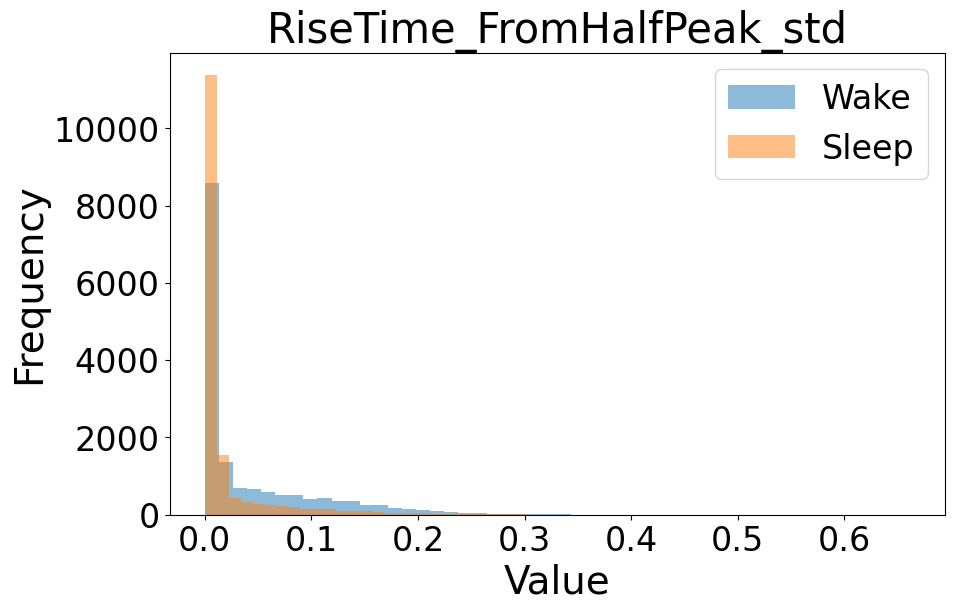

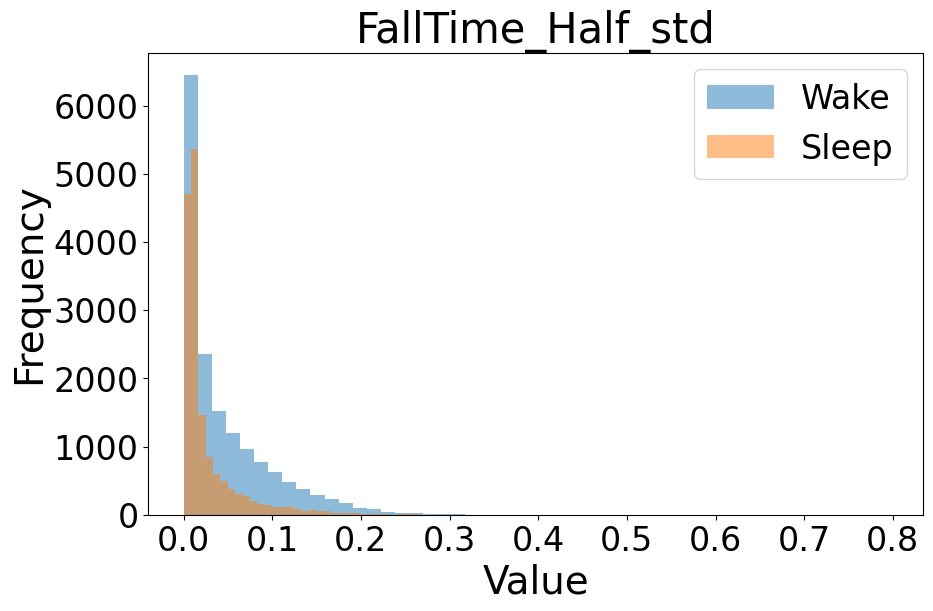

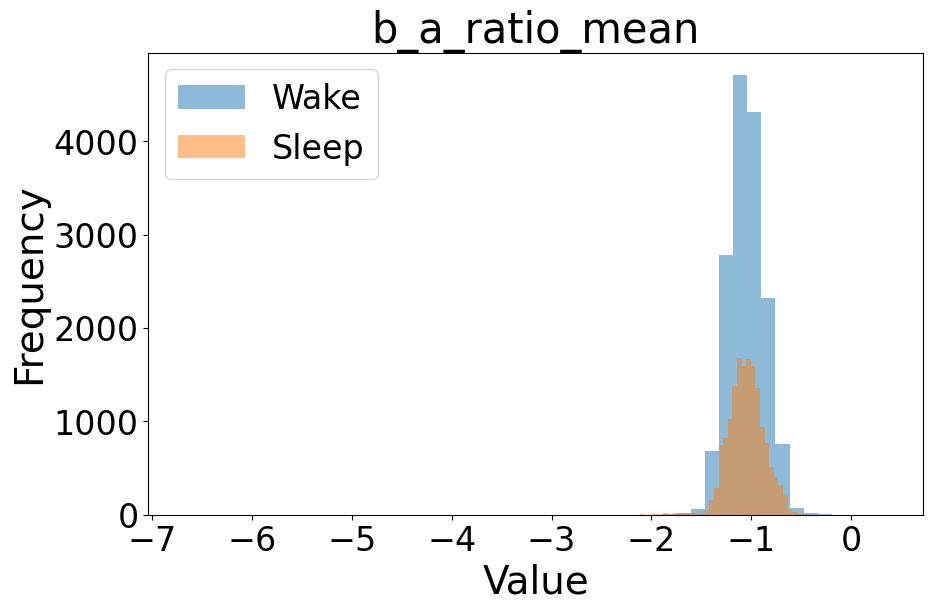

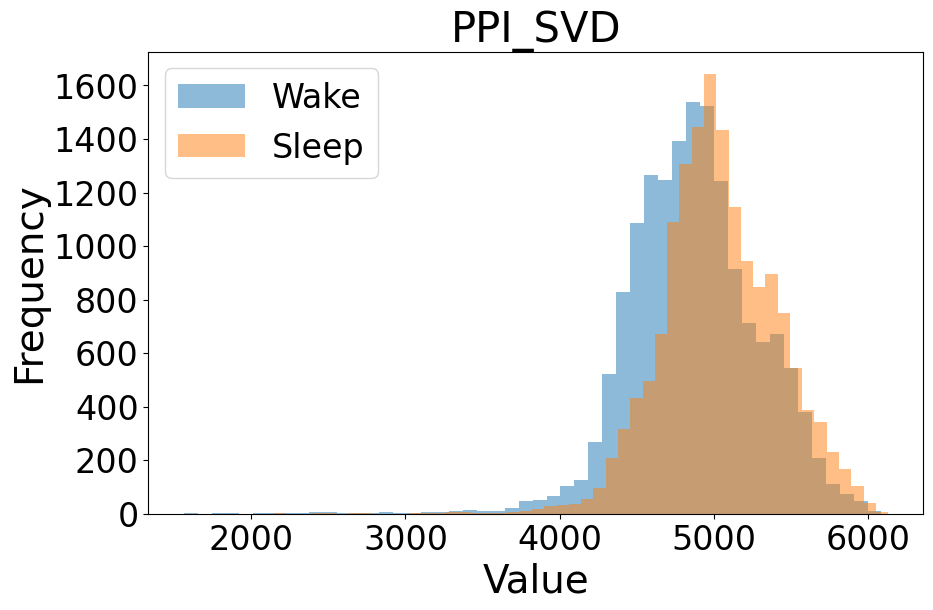

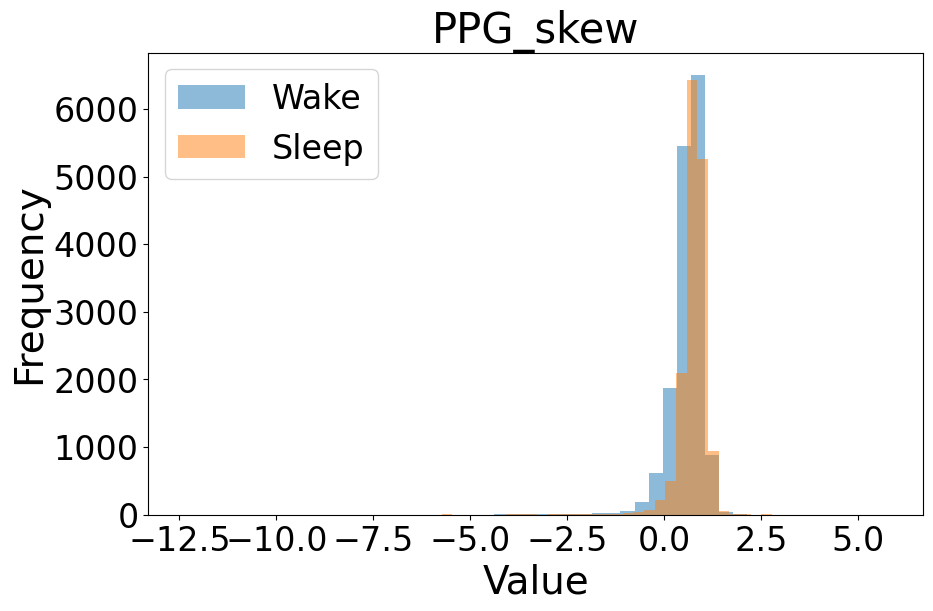

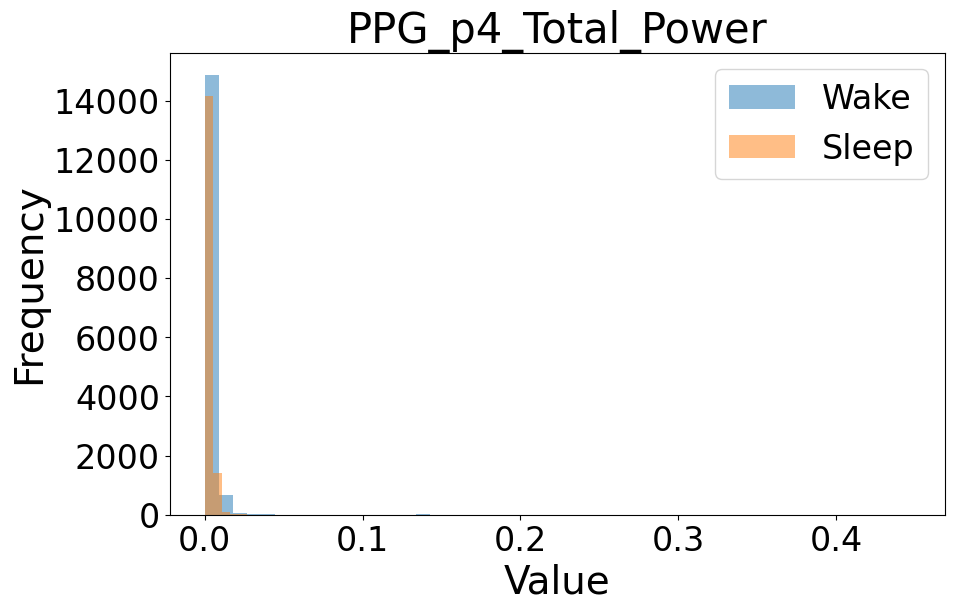

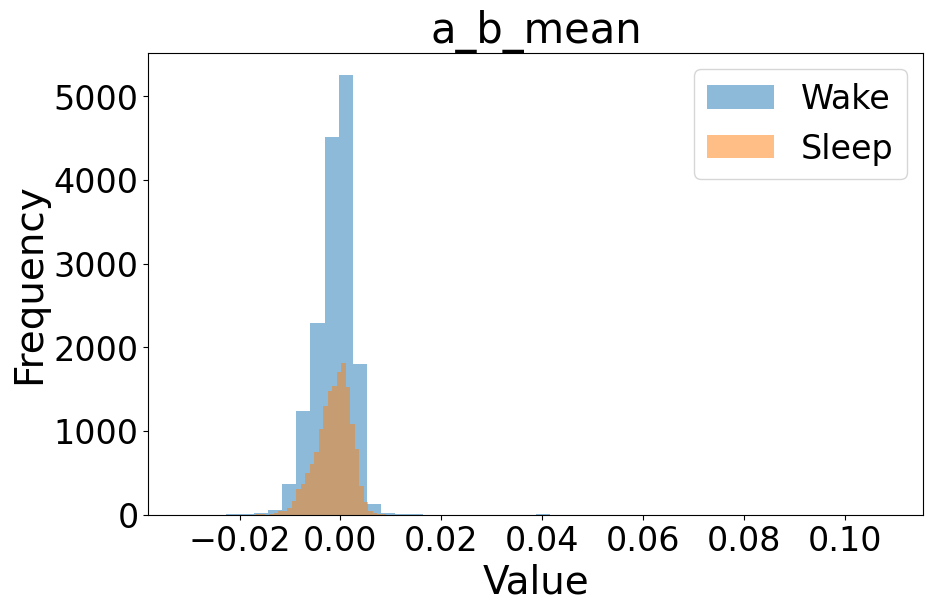

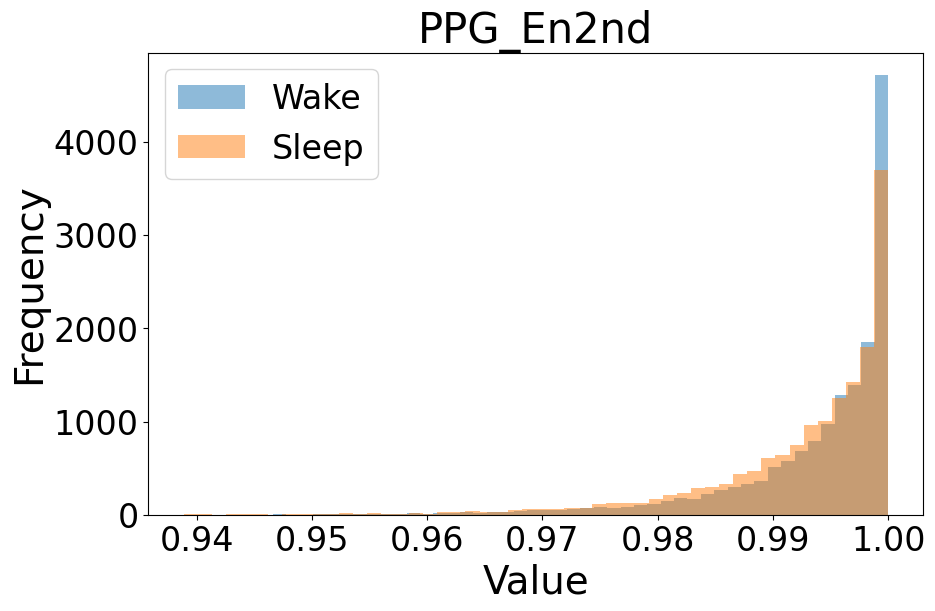

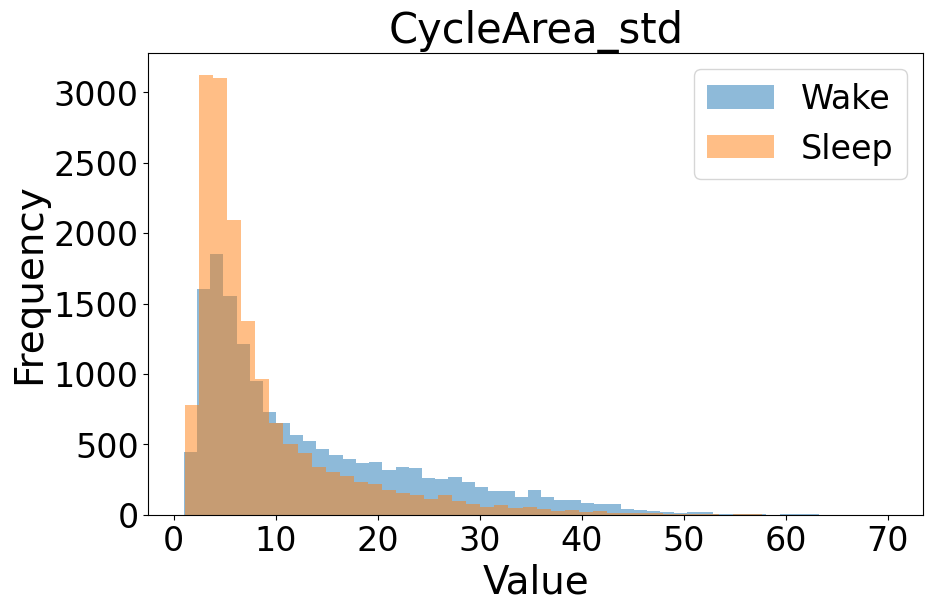

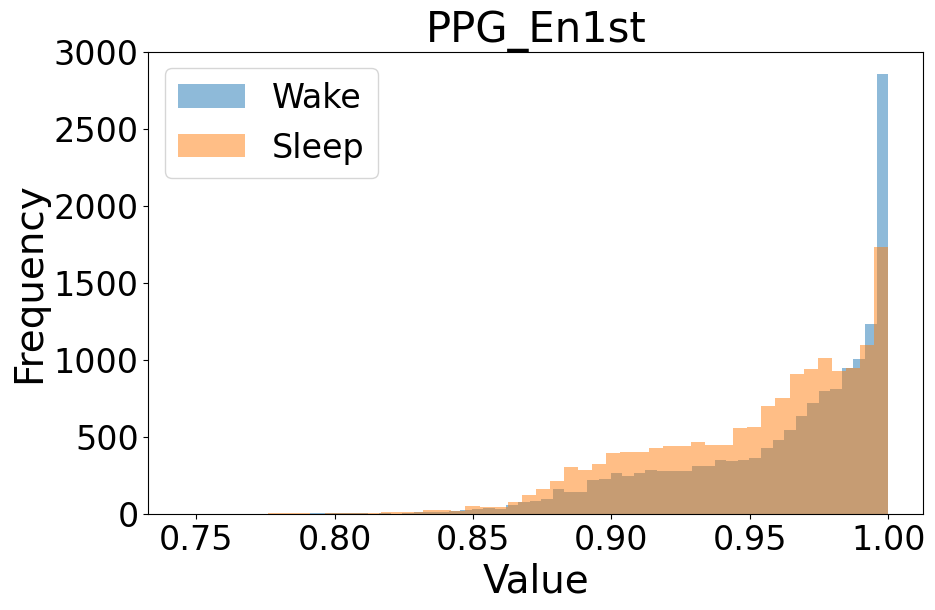

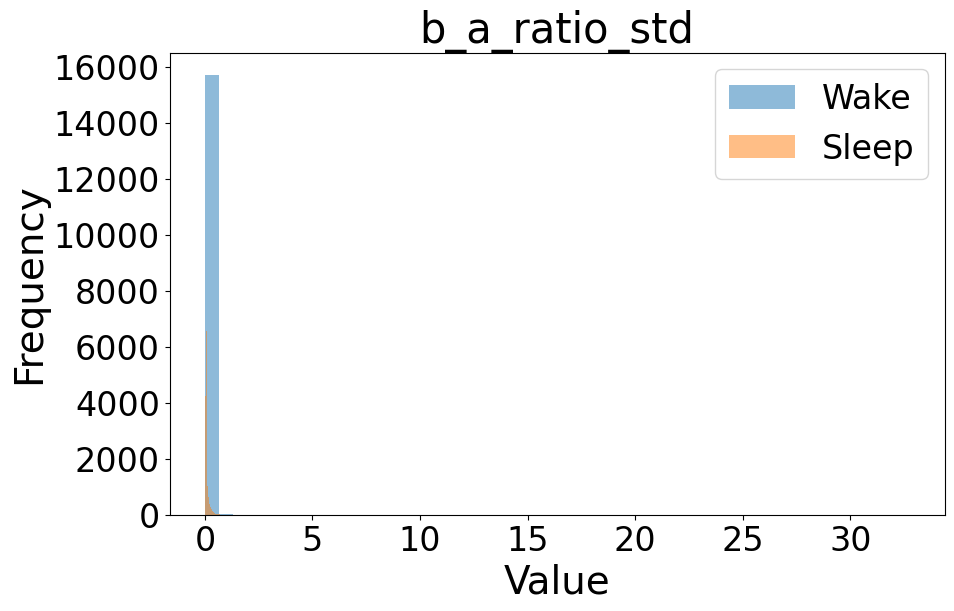

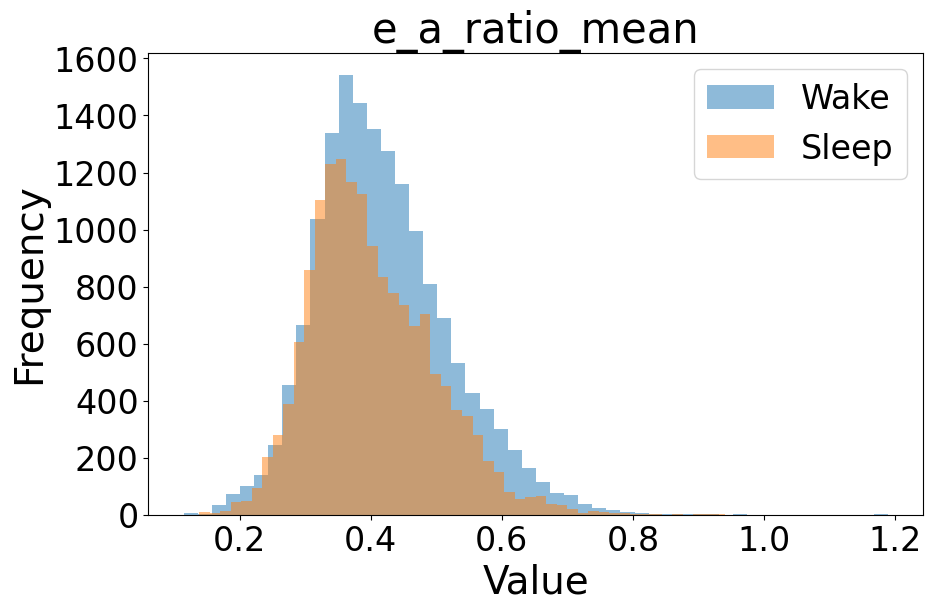

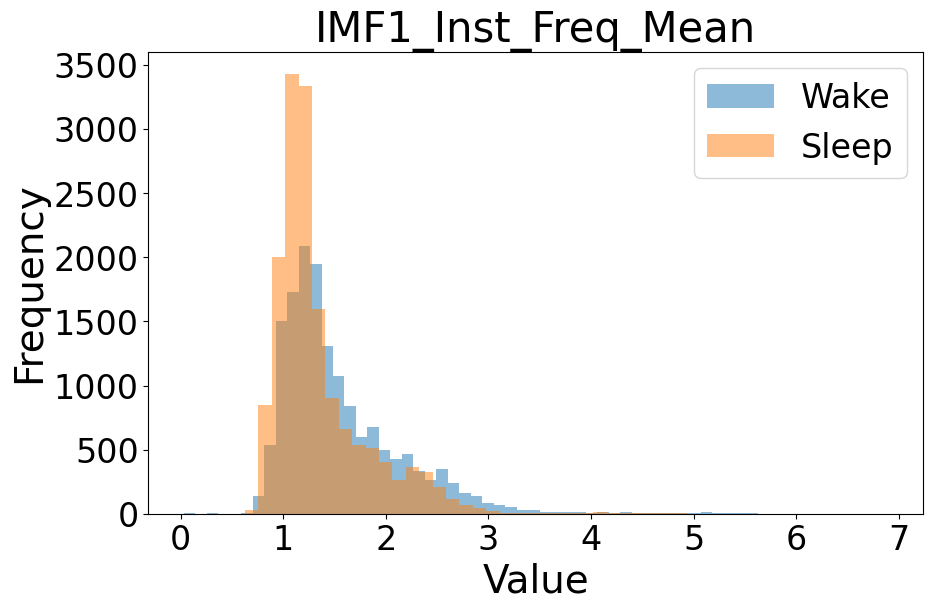

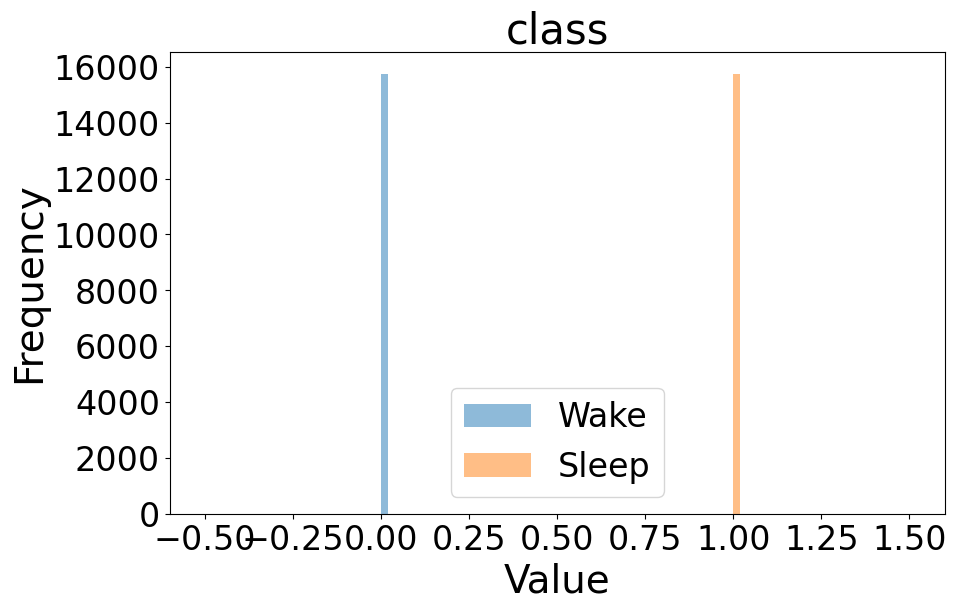

In [ ]:
class_labels = {
    0: "Wake",
    1: "Sleep"
}
# Plot histograms for each feature
top_20_features['class'] = y_resampled  # Add the class labels

feature_names = top_20_features.columns
for feature in feature_names:  # Exclude the 'class' column
    plt.figure(figsize=(10, 6))
    for class_value in np.unique(y_resampled):  # Handles any number of classes
        subset = top_20_features[top_20_features['class'] == class_value]
        plt.hist(subset[feature], bins=50, alpha=0.5, label=class_labels[class_value])
    plt.title(f'{feature}', fontsize = 30)
    plt.xlabel('Value', fontsize = 28)
    plt.ylabel('Frequency', fontsize = 28)
    plt.xticks(fontsize = 24)
    plt.yticks(fontsize = 24)
    plt.legend( fontsize = 24)
    plt.show()